In [437]:
import os

# Scientific Python Libraries
import pandas as pd
import numpy as np
import math

# Essential libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mn
from matplotlib.pyplot import show

import warnings
warnings.filterwarnings("ignore")

# Essential for splitting into train and test data
from sklearn.model_selection import train_test_split   

#Importing the models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
# !pip install xgboost
import xgboost as xgb

# Essential libraries for evaluating performance metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [438]:
data=pd.read_csv('weather.csv')      # read dataset
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,2013/1/1,Los Angeles,11.3,26.5,0.0,WNW,56.0,W,WNW,19.0,31.0,46.0,26.0,1004.5,1003.2,19.7,25.7,No
1,2013/1/2,Los Angeles,9.6,23.9,0.0,W,41.0,WSW,SSW,19.0,11.0,44.0,22.0,1014.4,1013.1,14.9,22.1,No
2,2013/1/3,Los Angeles,10.5,28.8,0.0,SSE,26.0,SSE,E,11.0,7.0,43.0,22.0,1018.7,1014.8,17.1,26.5,No
3,2013/1/4,Los Angeles,12.3,34.6,0.0,WNW,37.0,SSE,NW,6.0,17.0,41.0,12.0,1015.1,1010.3,20.7,33.9,No
4,2013/1/5,Los Angeles,12.9,35.8,0.0,WNW,41.0,ENE,NW,6.0,26.0,41.0,9.0,1012.6,1009.2,22.4,34.4,No


In [439]:
data.shape

(3009, 18)

In [440]:
data.isnull().sum()

Date               0
Location           0
MinTemp           11
MaxTemp           11
Rainfall          28
WindGustDir       31
WindGustSpeed     31
WindDir9am       523
WindDir3pm        46
WindSpeed9am       8
WindSpeed3pm      11
Humidity9am        9
Humidity3pm        8
Pressure9am        5
Pressure3pm        8
Temp9am            9
Temp3pm            8
RainTomorrow      28
dtype: int64

In [441]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainTomorrow      object
dtype: object

In [442]:
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,2998.000000,2998.000000,2981.000000,2978.000000,3001.000000,2998.000000,3000.000000,3001.000000,3004.000000,3001.000000,3000.000000,3001.000000
mean,9.489460,22.592762,1.915263,32.880792,8.160613,14.332555,74.260333,48.017661,1018.461352,1015.852249,14.313267,21.330990
std,6.077134,7.808694,6.246152,13.349224,6.711795,7.186431,17.369911,19.740804,7.327085,7.078506,6.376921,7.530849
min,-2.800000,6.800000,0.000000,9.000000,0.000000,0.000000,18.000000,7.000000,989.800000,982.900000,0.300000,6.400000
25%,4.700000,15.800000,0.000000,24.000000,4.000000,9.000000,61.000000,33.000000,1013.500000,1010.900000,9.200000,14.800000
50%,9.000000,21.800000,0.000000,31.000000,7.000000,13.000000,76.000000,47.000000,1018.400000,1015.700000,13.900000,20.500000
75%,14.300000,28.800000,0.400000,41.000000,11.000000,19.000000,88.000000,61.000000,1023.400000,1020.600000,19.300000,27.200000
max,28.300000,44.800000,104.200000,107.000000,37.000000,50.000000,100.000000,100.000000,1039.900000,1036.100000,34.500000,43.400000


In [443]:
# separating numerical and categorical features

numerical_feature = [f for f in data.columns if data[f].dtypes != 'object']
categorical_feature = [f for f in data.columns if f not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print(numerical_feature)
print("Categorical feature Count {}".format(len(categorical_feature)))
print(categorical_feature)

Numerical Features Count 12
['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
Categorical feature Count 6
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow']


<AxesSubplot:>

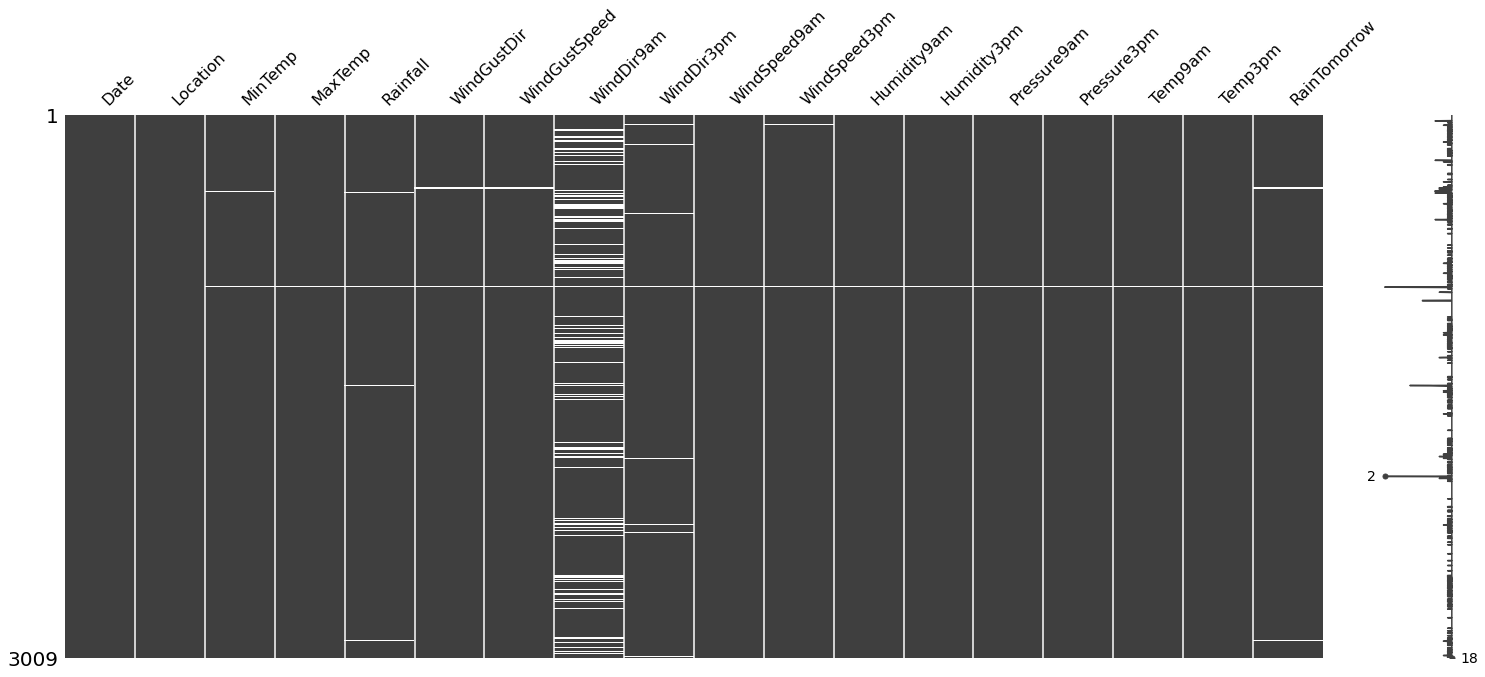

In [444]:
mn.matrix(data)

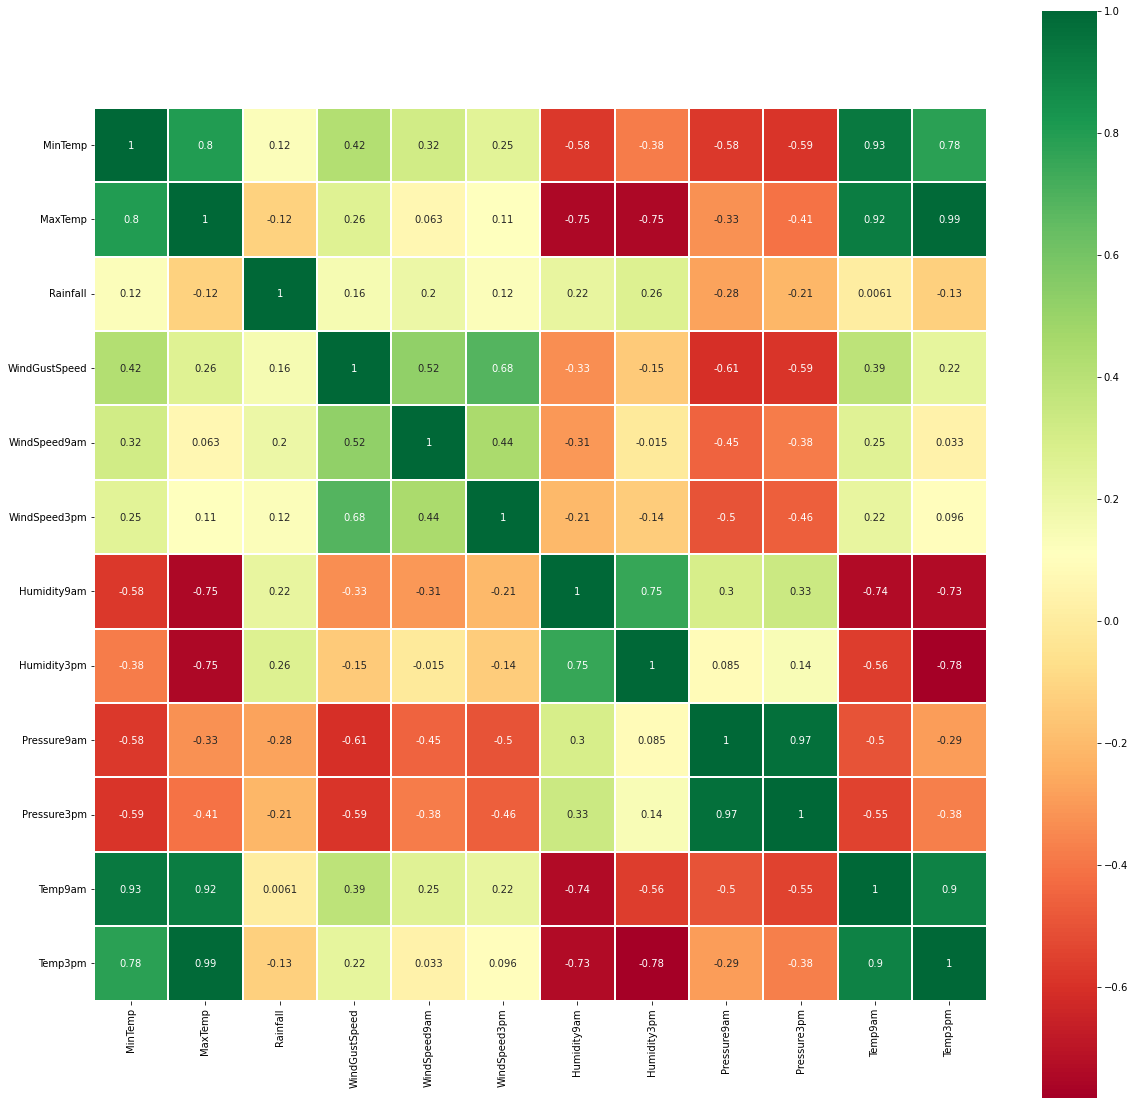

In [445]:
# heatmap for corrleation

plt.figure(figsize = (20,20))
ax= sns.heatmap(data.corr(), annot = True, cmap="RdYlGn",linewidth =2,  square= True)

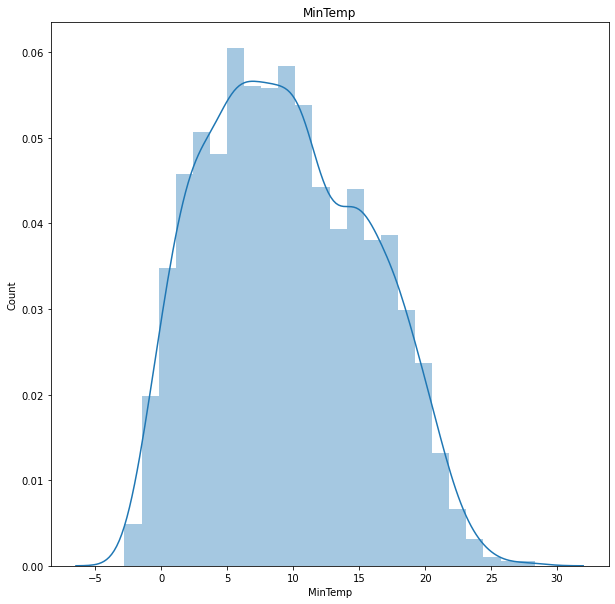

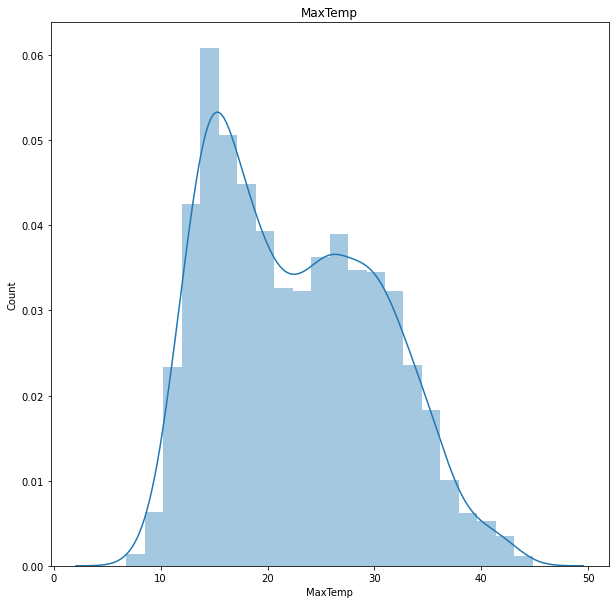

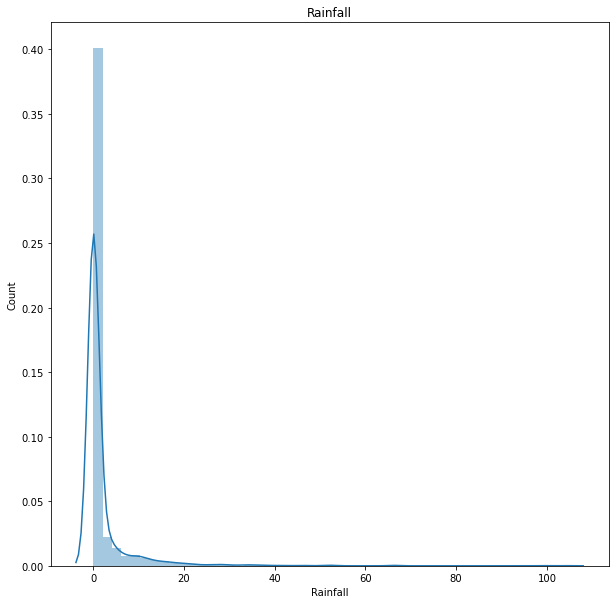

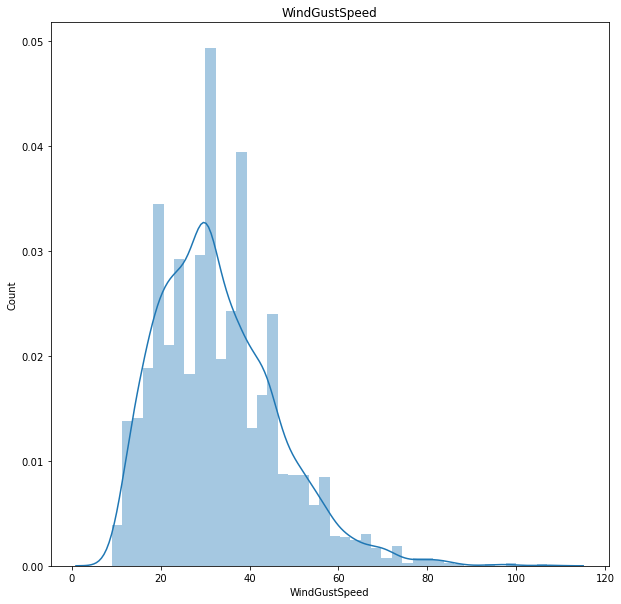

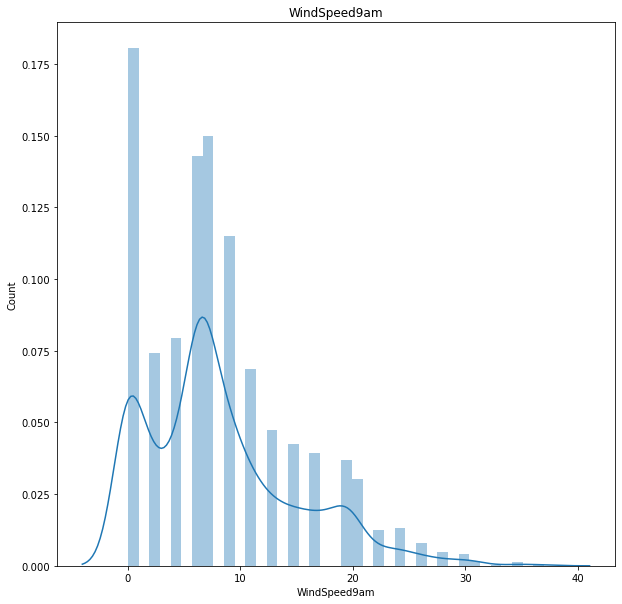

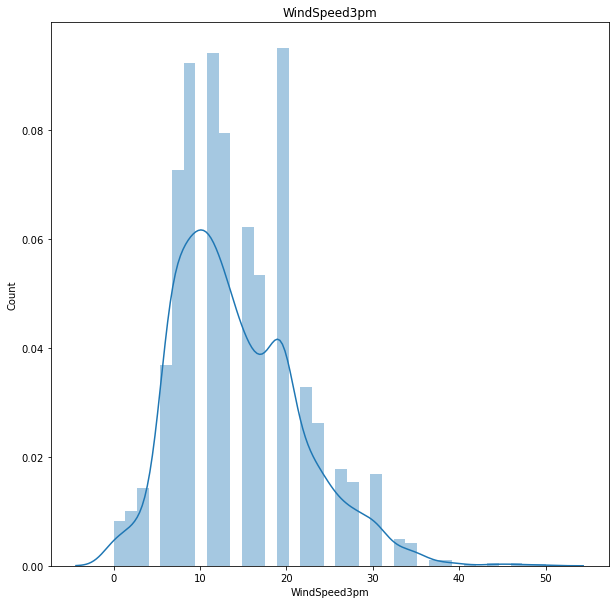

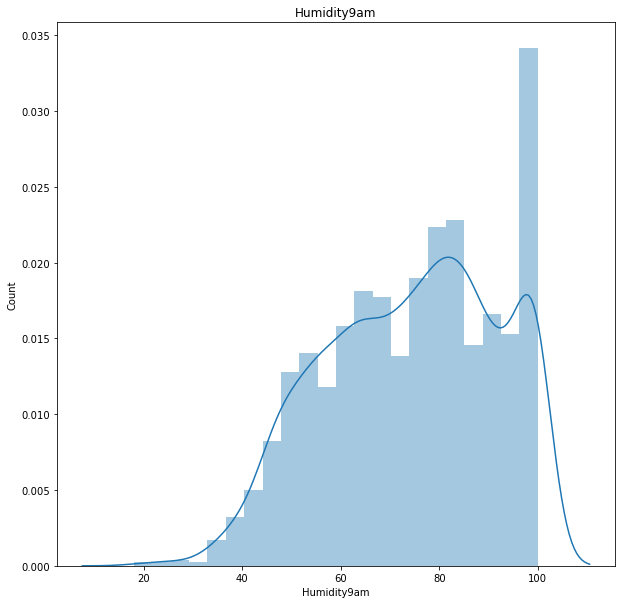

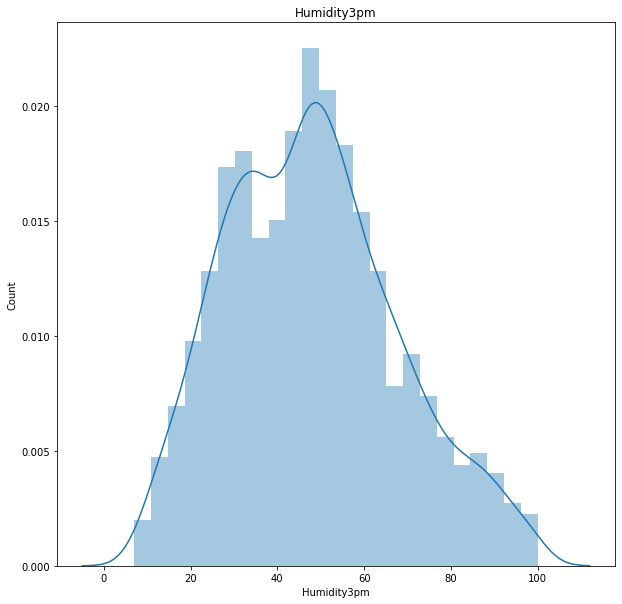

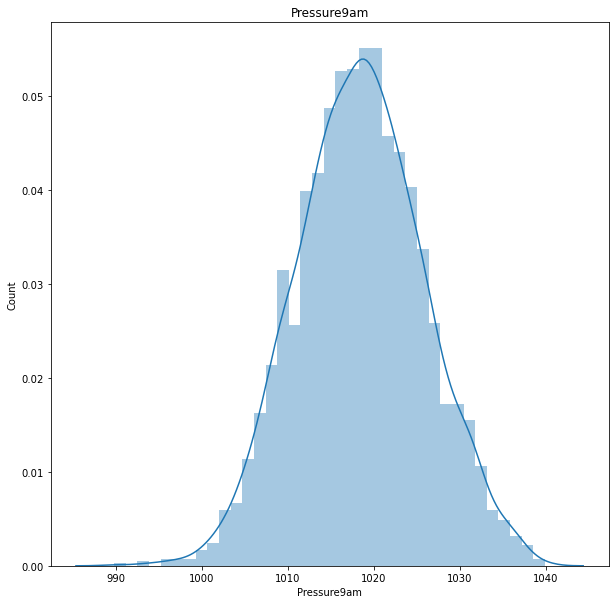

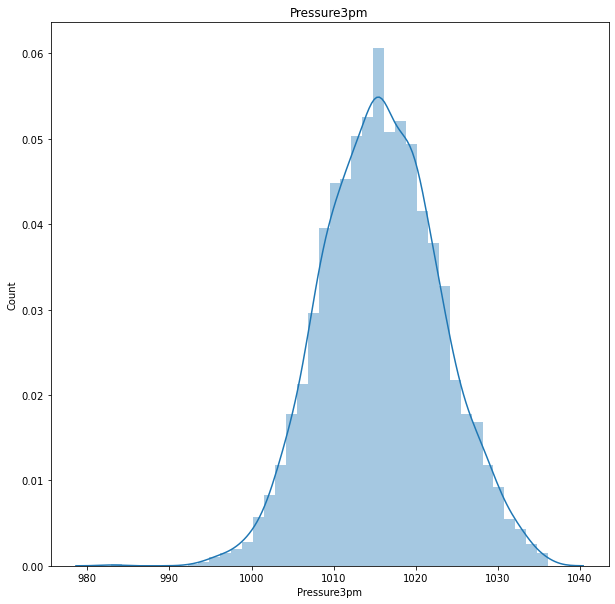

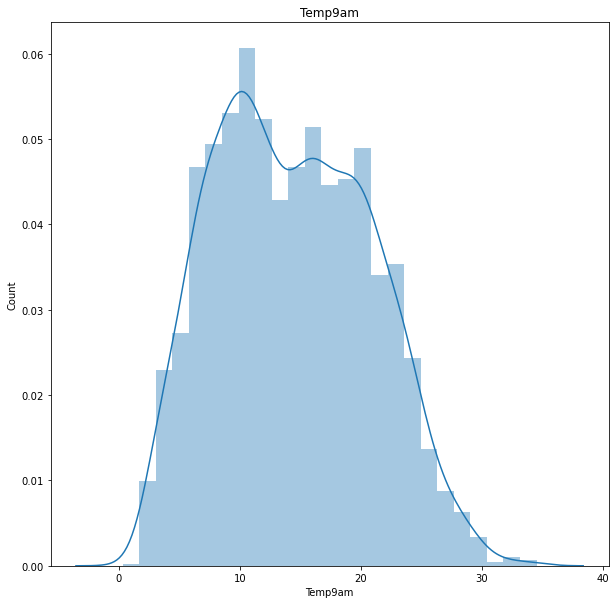

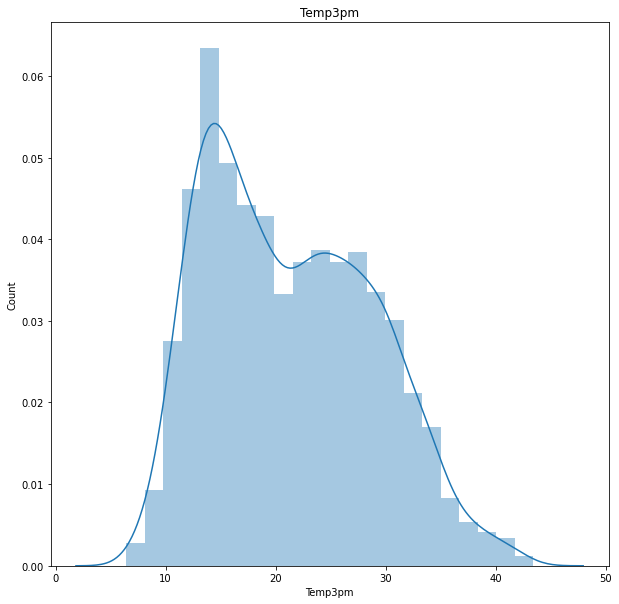

In [446]:
for feature in numerical_feature:
    df=data.copy()
    plt.figure(figsize=(10,10))
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

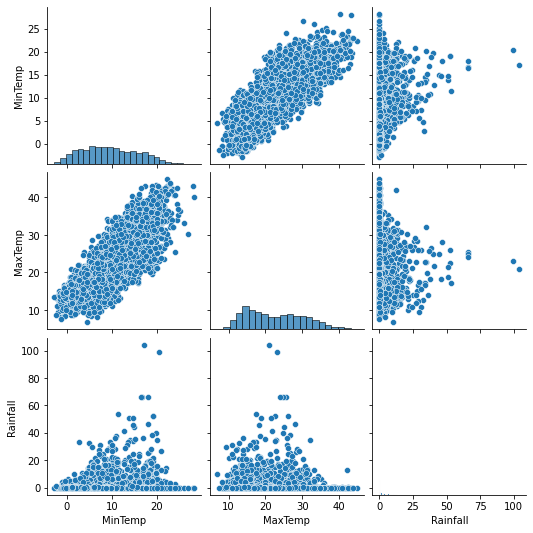

In [447]:
cor_relation=data[['MinTemp', 'MaxTemp', 'Rainfall']]
sns.pairplot(cor_relation)

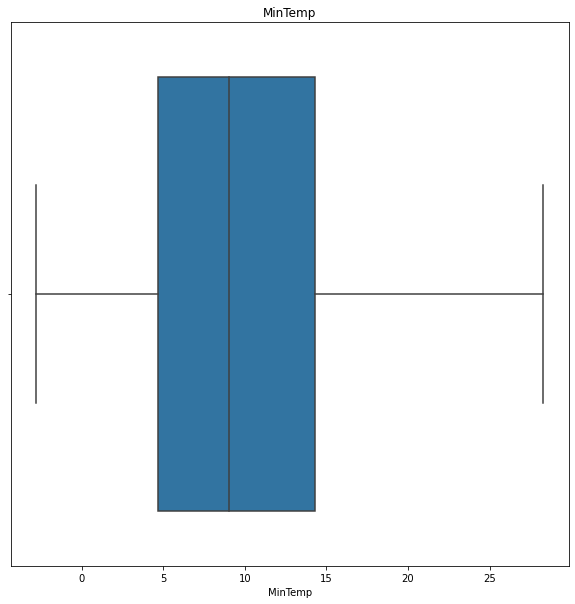

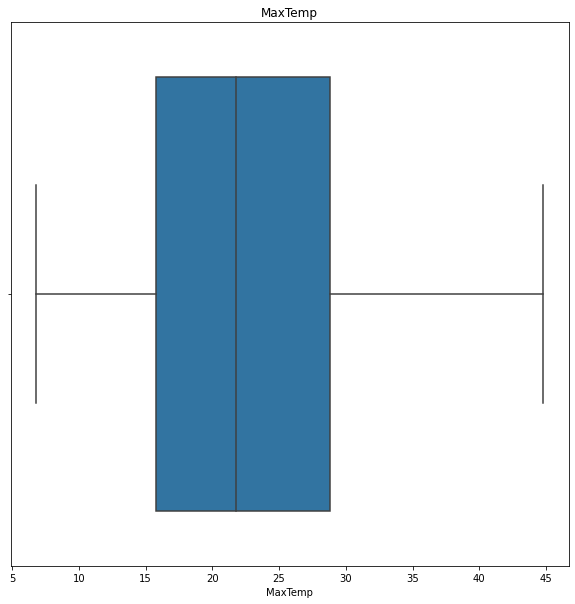

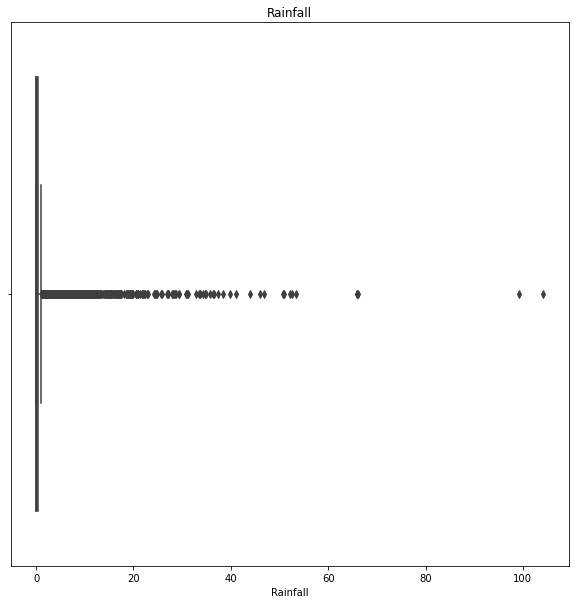

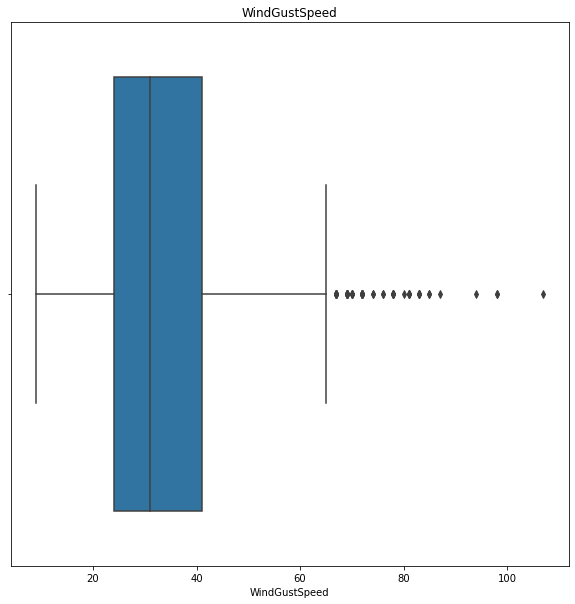

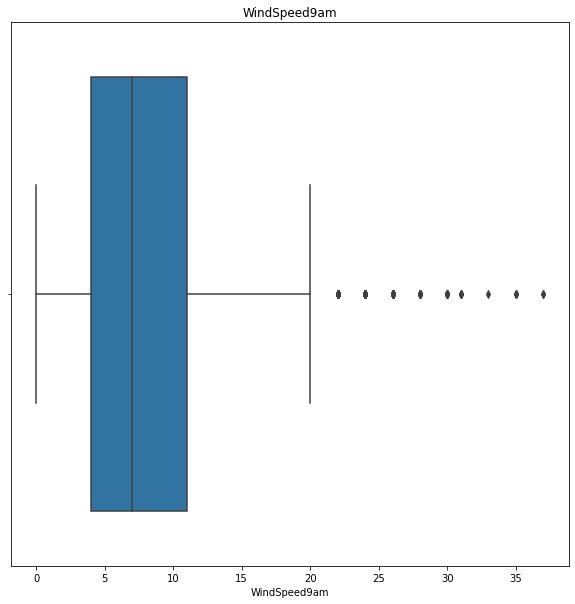

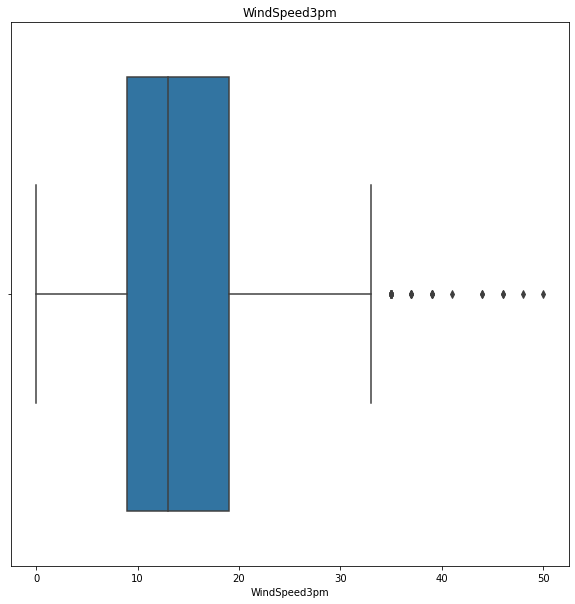

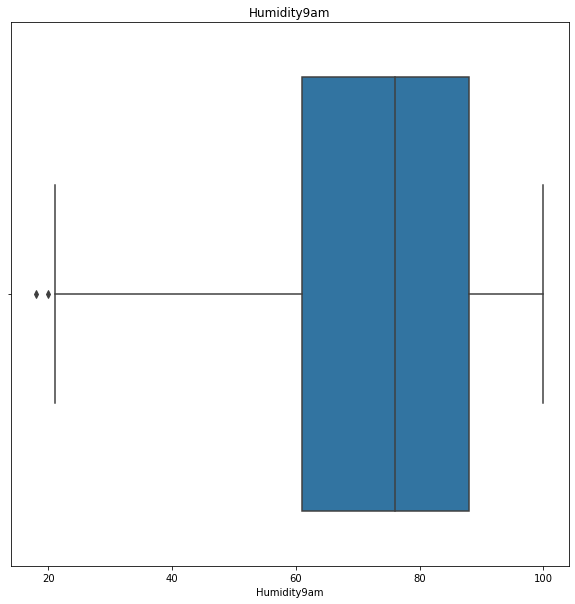

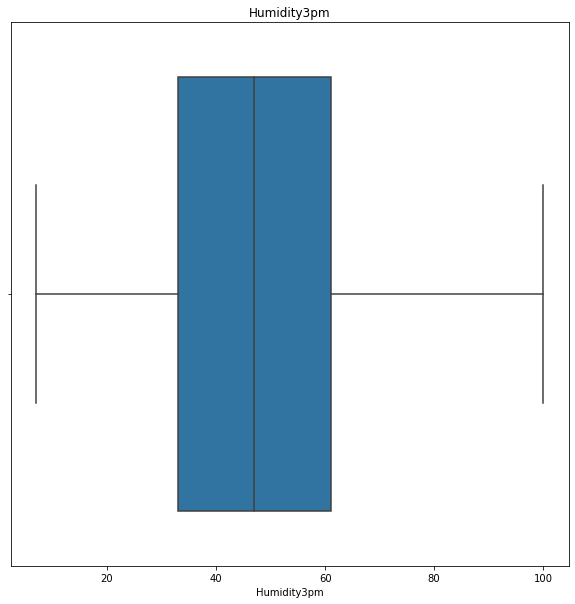

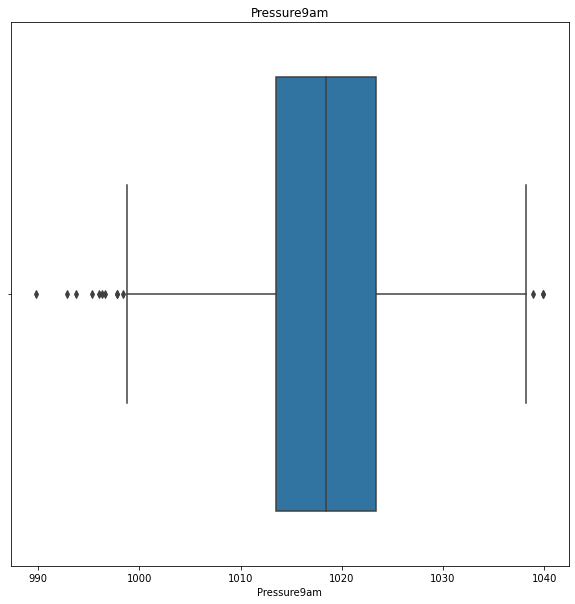

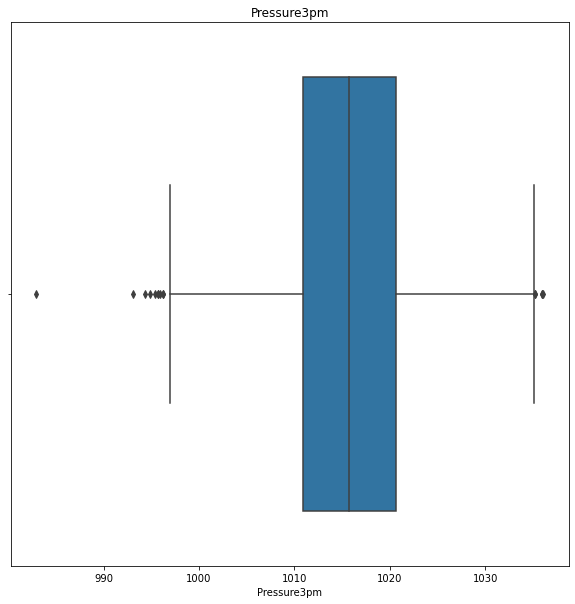

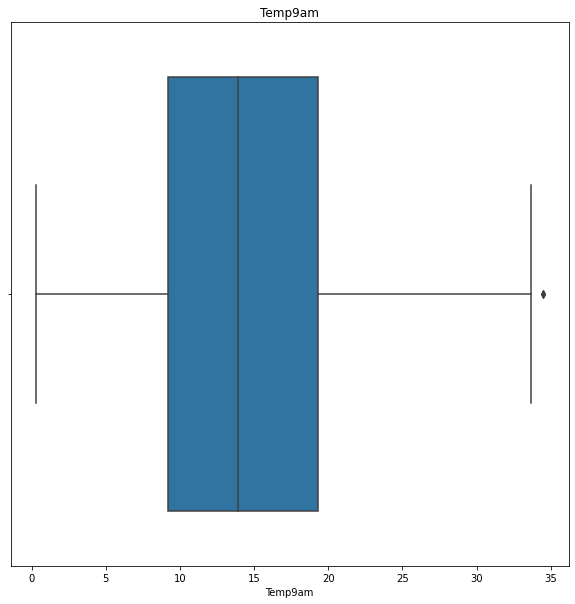

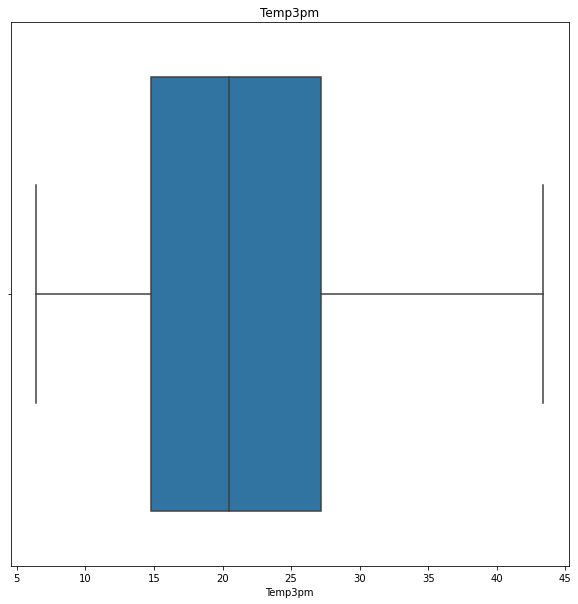

In [448]:
# checking for outliers

for feature in numerical_feature:
    data=df.copy()
    plt.figure(figsize=(10,10))
    sns.boxplot(data[feature])
    plt.title(feature)

In [449]:
# pre-processing 
for feature in numerical_feature:
    if(data[feature].isnull().sum())>0:
        data[feature] = data[feature].fillna(data[feature].median())

In [450]:
# checking for null values count

data.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir       31
WindGustSpeed      0
WindDir9am       523
WindDir3pm        46
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainTomorrow      28
dtype: int64

In [451]:
# one hot encoding
data["RainTomorrow"] = pd.get_dummies(data["RainTomorrow"], drop_first = True)

In [452]:
for feature in categorical_feature:
    print(feature, (data.groupby([feature])["RainTomorrow"].unique().index))

Date Index(['2013/1/1', '2013/1/10', '2013/1/11', '2013/1/12', '2013/1/13',
       '2013/1/14', '2013/1/15', '2013/1/16', '2013/1/17', '2013/1/18',
       ...
       '2021/6/23', '2021/6/24', '2021/6/25', '2021/6/3', '2021/6/4',
       '2021/6/5', '2021/6/6', '2021/6/7', '2021/6/8', '2021/6/9'],
      dtype='object', name='Date', length=3009)
Location Index(['Los Angeles'], dtype='object', name='Location')
WindGustDir Index(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object', name='WindDir3pm')
RainTomorrow UInt64Index([0, 1], dtype='uint64', name='RainTomorrow')


In [453]:
# mapping categorical features 
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'E':0, 'ENE':1, 'ESE':2, 'N':3, 'NE':4, 'NNE':5, 'NNW':6, 'NW':7, 'S':8, 'SE':9, 'SSE':10,
       'SSW':11, 'SW':12, 'W':13, 'WNW':14, 'WSW':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'E':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'W':14, 'ESE':15}

In [454]:
data["WindGustDir"] = data["WindGustDir"].map(windgustdir)
data["WindDir9am"] = data["WindDir9am"].map(winddir9am)
data["WindDir3pm"] = data["WindDir3pm"].map(winddir3pm)

In [455]:
for feature in data[['WindGustDir','WindDir9am','WindDir3pm']]:
    data[feature] = data[feature].fillna(data[feature].value_counts().index[0])

In [ ]:
# check for null values after pre-processing

In [457]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

In [458]:
lst=df['MaxTemp']
print(np.mean(lst))
print(np.var(lst))
print(np.std(lst))
print(np.quantile(lst,[0,0.25,0.5,0.75,1]))

22.592761841227457
60.9553612181303
7.807391447732738
[nan nan nan nan nan]


In [459]:
import math
print("margin of error is:",np.std(df['MaxTemp'])/math.sqrt(len(df['MaxTemp'])))
print("margin of error is:",np.std(df['MinTemp'])/math.sqrt(len(df['MinTemp'])))

margin of error is: 0.14232947936841794
margin of error is: 0.11076823958986011


In [461]:
data["Date"] = pd.to_datetime(data["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [462]:
data["Date_year"]= data["Date"].dt.year
data["Date_month"] = data["Date"].dt.month
data["Date_day"] = data["Date"].dt.day

In [463]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,Date_year,Date_month,Date_day
0,2013-01-01,Los Angeles,11.3,26.5,0.0,2.0,56.0,13.0,3.0,19.0,...,46.0,26.0,1004.5,1003.2,19.7,25.7,0,2013,1,1
1,2013-01-02,Los Angeles,9.6,23.9,0.0,4.0,41.0,15.0,7.0,19.0,...,44.0,22.0,1014.4,1013.1,14.9,22.1,0,2013,1,2
2,2013-01-03,Los Angeles,10.5,28.8,0.0,10.0,26.0,10.0,4.0,11.0,...,43.0,22.0,1018.7,1014.8,17.1,26.5,0,2013,1,3
3,2013-01-04,Los Angeles,12.3,34.6,0.0,2.0,37.0,10.0,0.0,6.0,...,41.0,12.0,1015.1,1010.3,20.7,33.9,0,2013,1,4
4,2013-01-05,Los Angeles,12.9,35.8,0.0,2.0,41.0,1.0,0.0,6.0,...,41.0,9.0,1012.6,1009.2,22.4,34.4,0,2013,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,2021-06-21,Los Angeles,1.2,15.2,0.4,14.0,15.0,9.0,5.0,0.0,...,100.0,62.0,1029.4,1026.7,2.9,14.3,0,2021,6,21
3005,2021-06-22,Los Angeles,0.8,13.4,0.0,4.0,17.0,8.0,14.0,6.0,...,100.0,66.0,1029.4,1025.9,3.6,13.3,0,2021,6,22
3006,2021-06-23,Los Angeles,1.1,11.9,0.0,12.0,44.0,10.0,12.0,9.0,...,100.0,81.0,1022.3,1017.7,2.7,10.2,0,2021,6,23
3007,2021-06-24,Los Angeles,1.1,14.1,0.2,5.0,28.0,12.0,14.0,4.0,...,100.0,49.0,1018.8,1017.2,3.9,13.1,0,2021,6,24


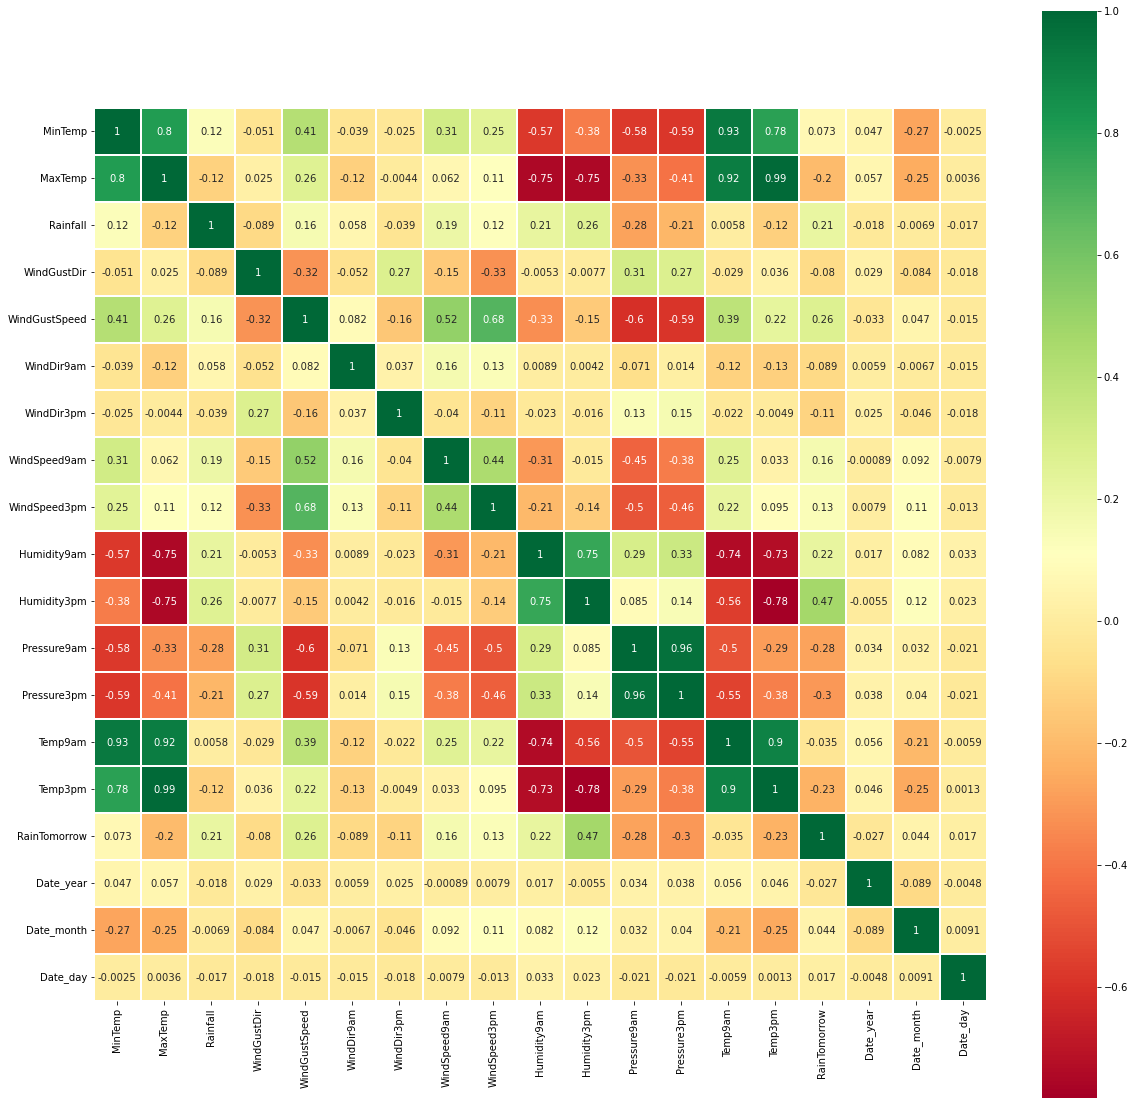

In [464]:
plt.figure(figsize = (20,20))
ax= sns.heatmap(data.corr(), annot = True, cmap="RdYlGn",linewidth =2,  square= True)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

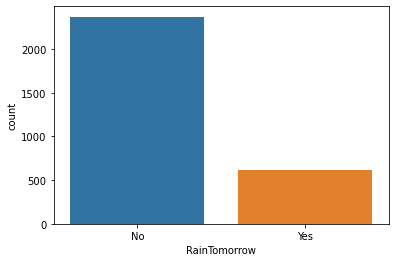

In [465]:
# output feature data are imbalanced

sns.countplot(df["RainTomorrow"])

In [466]:
# preventing outliers using IQR

IQR=data.MinTemp.quantile(0.75)-data.MinTemp.quantile(0.25)
lower_fence=data.MinTemp.quantile(0.25)-(IQR*1.5)
upper_fence=data.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_fence, upper_fence)

-9.700000000000003 28.700000000000003


In [467]:
data.loc[data['MinTemp']>=28.7,'MinTemp']=28.7
data.loc[data['MinTemp']<=-9.7,'MinTemp']=-9.7

In [468]:
IQR=data.MaxTemp.quantile(0.75)-data.MaxTemp.quantile(0.25)
lower_fence=data.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_fence=data.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_fence, upper_fence)

-3.6999999999999993 48.3


In [494]:
data.loc[data['MaxTemp']>=48.3,'MaxTemp']=48.3
data.loc[data['MaxTemp']<=3.7,'MaxTemp']=-3.7

In [495]:
IQR=data.Rainfall.quantile(0.75)-data.Rainfall.quantile(0.25)
lower_fence=data.Rainfall.quantile(0.25)-(IQR*1.5)
upper_fence=data.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_fence, upper_fence)

-0.6000000000000001 1.0


In [471]:
data.loc[data['Rainfall']>=1,'Rainfall']=1
data.loc[data['Rainfall']<=-0.6,'Rainfall']=-0.6

In [472]:
IQR=data.WindGustSpeed.quantile(0.75)-data.WindGustSpeed.quantile(0.25)
lower_fence=data.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_fence=data.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_fence, upper_fence)

-1.5 66.5


In [473]:
data.loc[data['WindGustSpeed']>=66.5,'WindGustSpeed']=66.5
data.loc[data['WindGustSpeed']<=-1.5,'WindGustSpeed']=-1.5

In [474]:
IQR=data.WindSpeed9am.quantile(0.75)-data.WindSpeed9am.quantile(0.25)
lower_fence=data.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_fence=data.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_fence, upper_fence)

-6.5 21.5


In [475]:
data.loc[data['WindSpeed9am']>=21.5,'WindSpeed9am']=21.5
data.loc[data['WindSpeed9am']<=-6.5,'WindSpeed9am']=-6.5

In [496]:
IQR=data.WindSpeed3pm.quantile(0.75)-data.WindSpeed3pm.quantile(0.25)
lower_fence=data.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_fence=data.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_fence, upper_fence)

-6.0 34.0


In [477]:
data.loc[data['WindSpeed3pm']>34,'WindSpeed3pm']=34
data.loc[data['WindSpeed3pm']<=-6,'WindSpeed3pm']=-6

In [478]:
IQR=data.Humidity9am.quantile(0.75)-data.Humidity9am.quantile(0.25)
lower_fence=data.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_fence=data.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_fence, upper_fence)

20.5 128.5


In [479]:
data.loc[data['Humidity9am']>=128.5,'Humidity9am']=128.5
data.loc[data['Humidity9am']<=20.5,'Humidity9am']=20.5

In [480]:
IQR=data.Pressure9am.quantile(0.75)-data.Pressure9am.quantile(0.25)
lower_fence=data.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_fence=data.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_fence, upper_fence)

998.6500000000001 1038.25


In [481]:
data.loc[data['Pressure9am']>=1038.25,'Pressure9am']=1038.25
data.loc[data['Pressure9am']<=998.65,'Pressure9am']=998.65

In [482]:
IQR=data.Pressure3pm.quantile(0.75)-data.Pressure3pm.quantile(0.25)
lower_fence=data.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_fence=data.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_fence, upper_fence)

996.3499999999999 1035.15


In [483]:
data.loc[data['Pressure3pm']>=1035.15,'Pressure3pm']=1035.15
data.loc[data['Pressure3pm']<=996.35,'Pressure3pm']=996.35

In [484]:
IQR=data.Temp9am.quantile(0.75)-data.Temp9am.quantile(0.25)
lower_fence=data.Temp9am.quantile(0.25)-(IQR*1.5)
upper_fence=data.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_fence, upper_fence)

-5.950000000000003 34.45


In [485]:
data.loc[data['Temp9am']>=34.45,'Temp9am']=34.45
data.loc[data['Temp9am']<=-5.95,'Temp9am']=-5.95

In [486]:
IQR=data.Temp3pm.quantile(0.75)-data.Temp3pm.quantile(0.25)
lower_fence=data.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_fence=data.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_fence, upper_fence)

-3.650000000000002 45.550000000000004


In [487]:
data.loc[data['Temp3pm']>=45.55,'Temp3pm']=45.55
data.loc[data['Temp3pm']<=-3.65,'Temp3pm']=-3.65

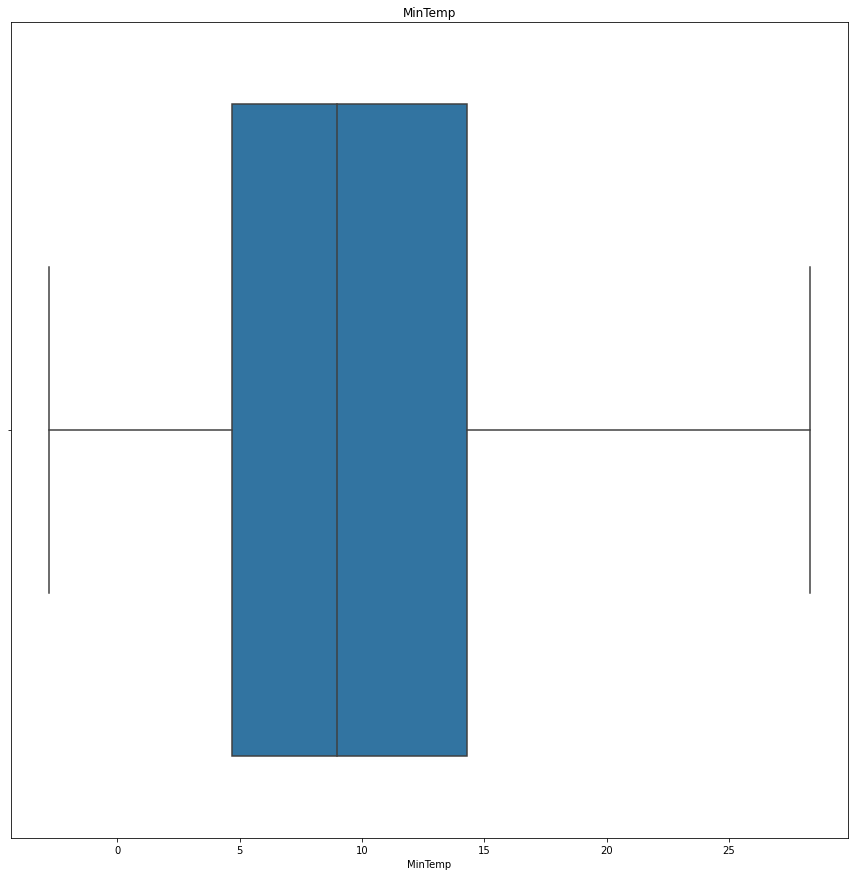

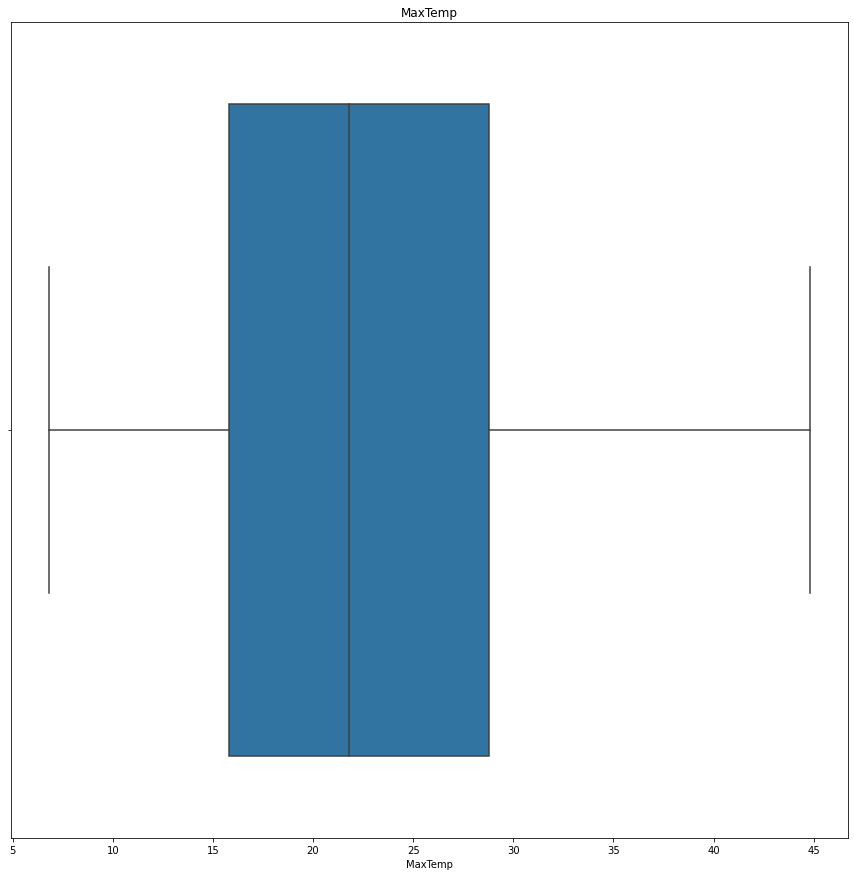

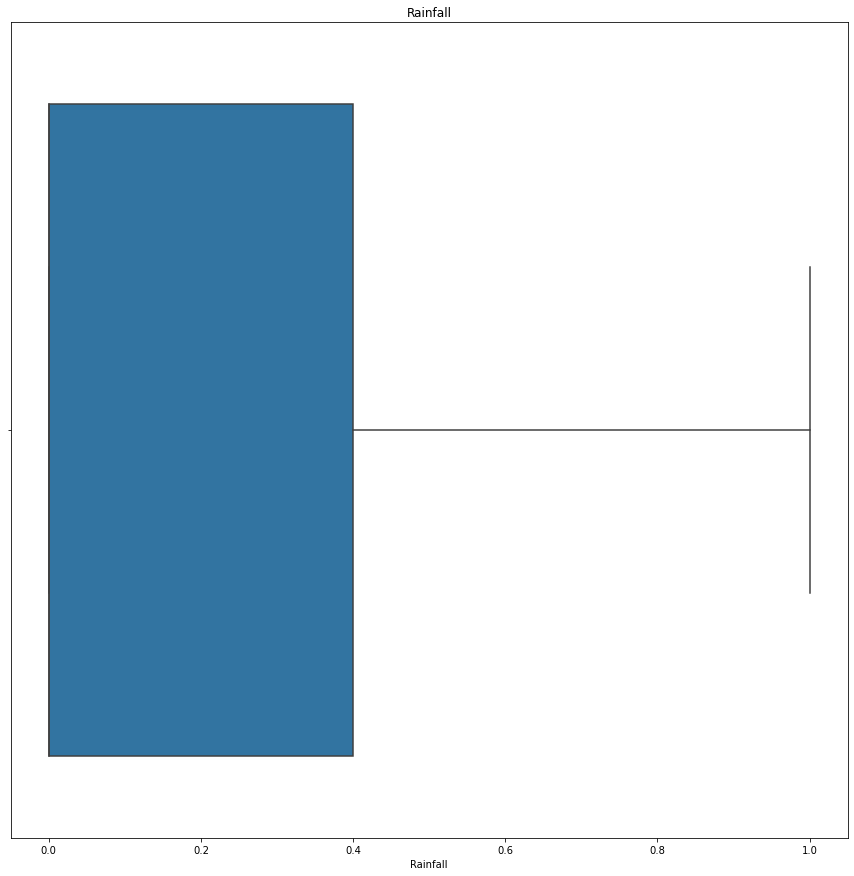

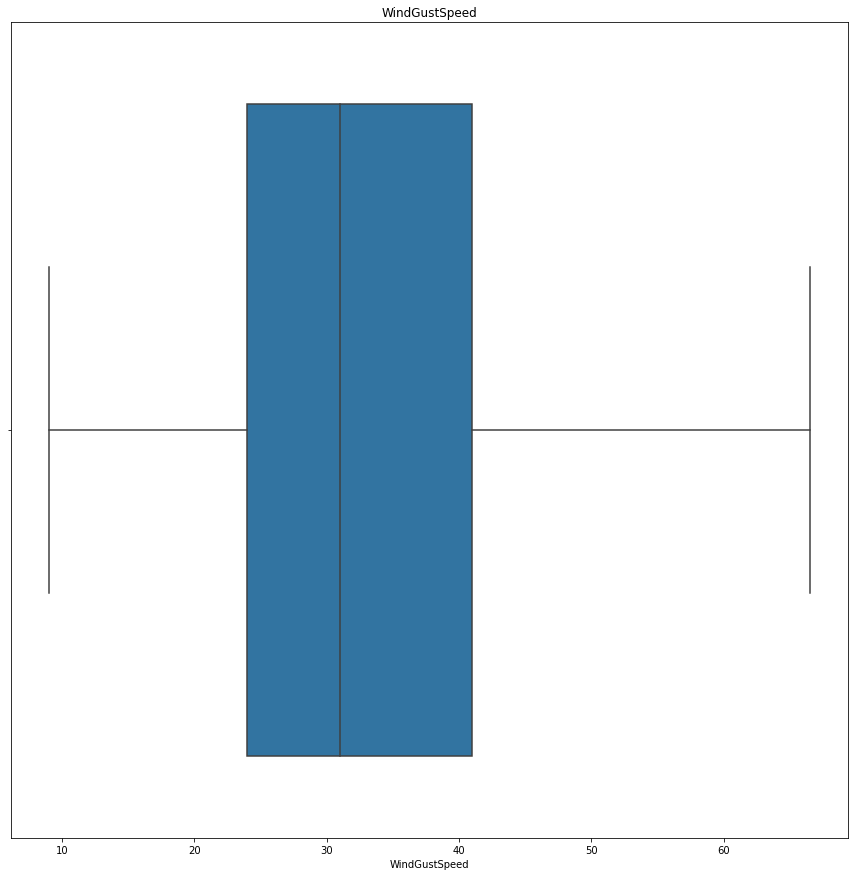

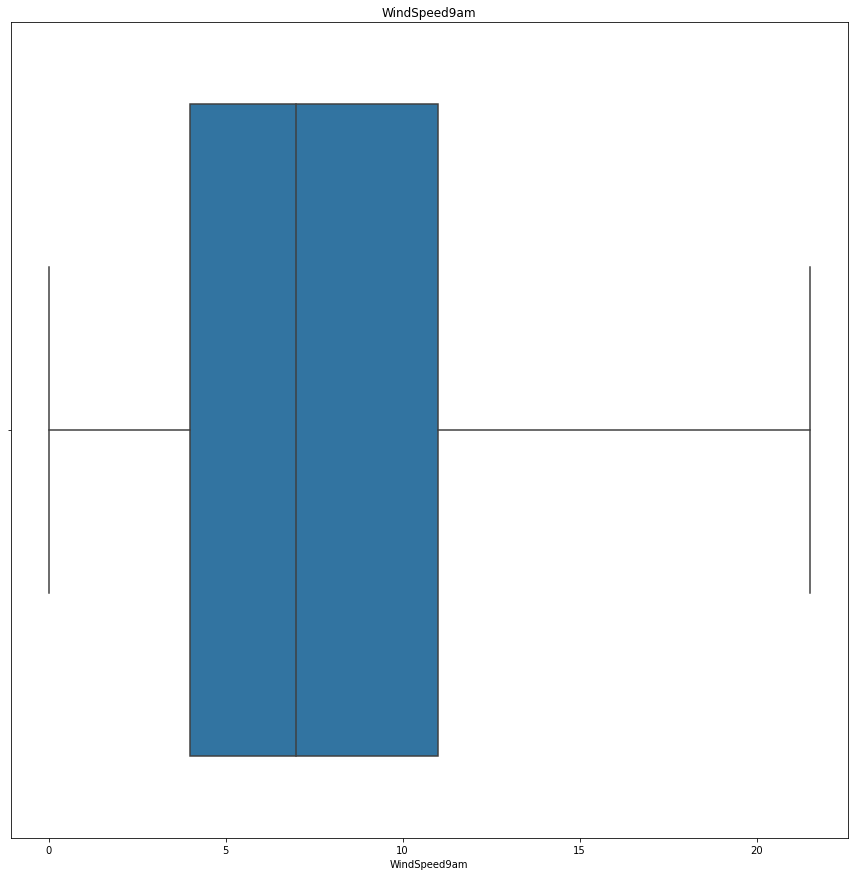

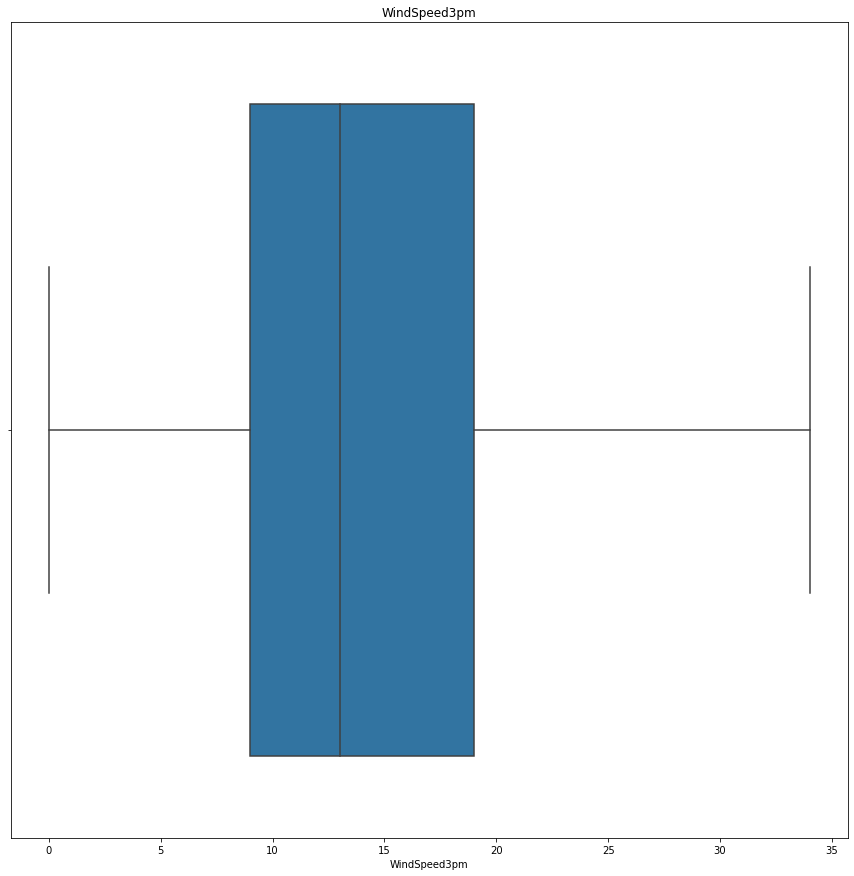

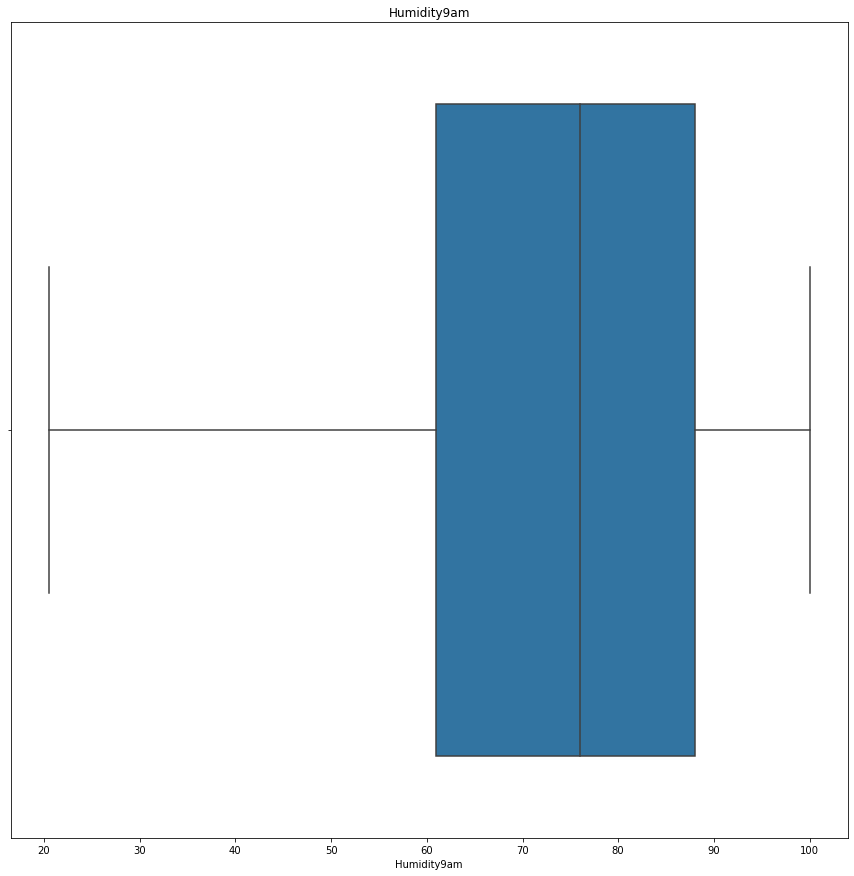

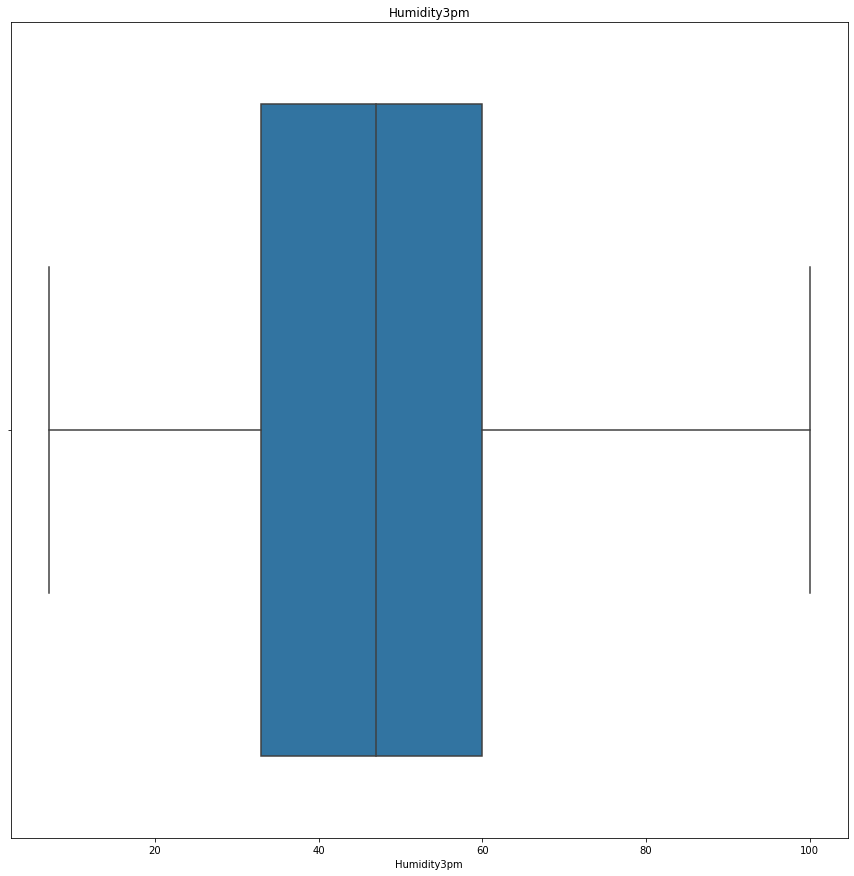

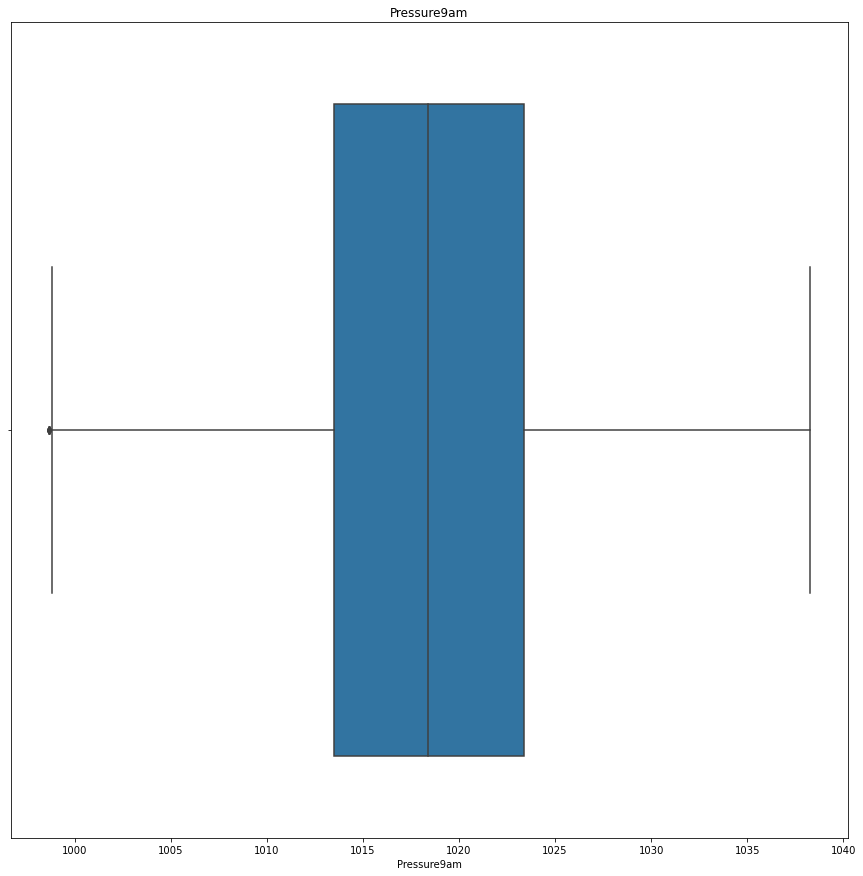

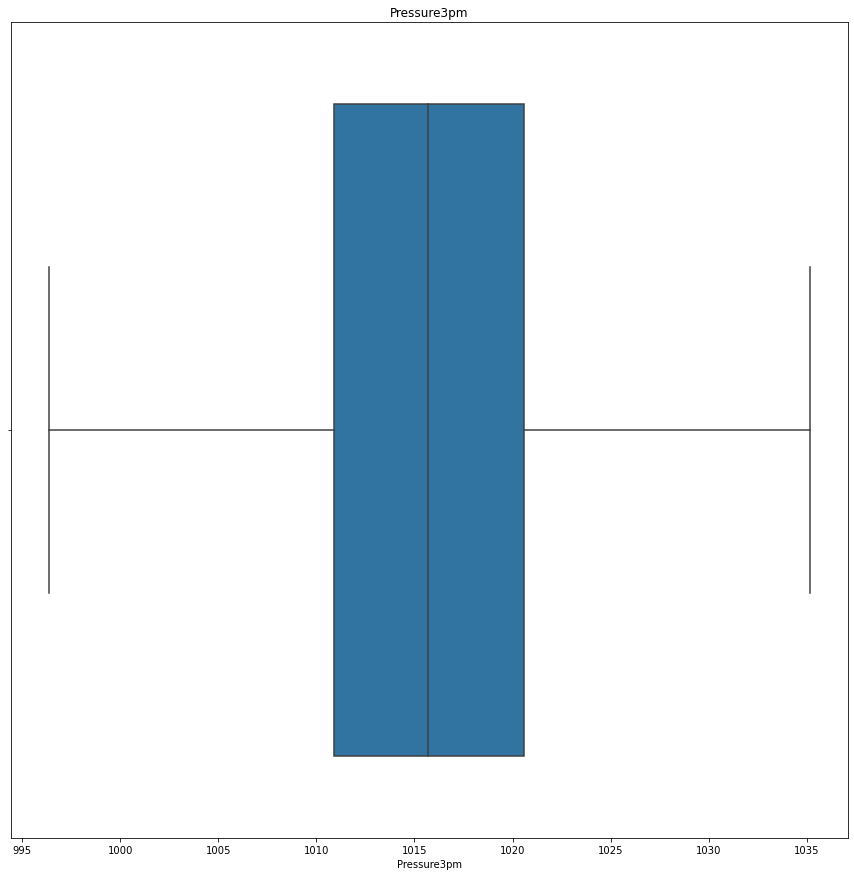

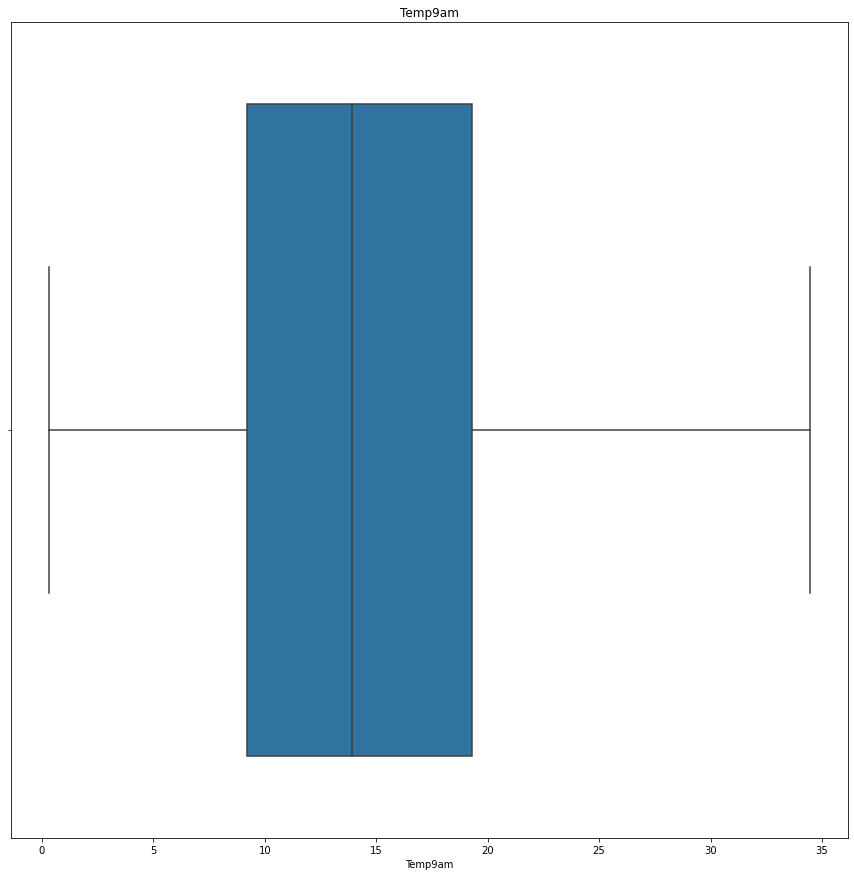

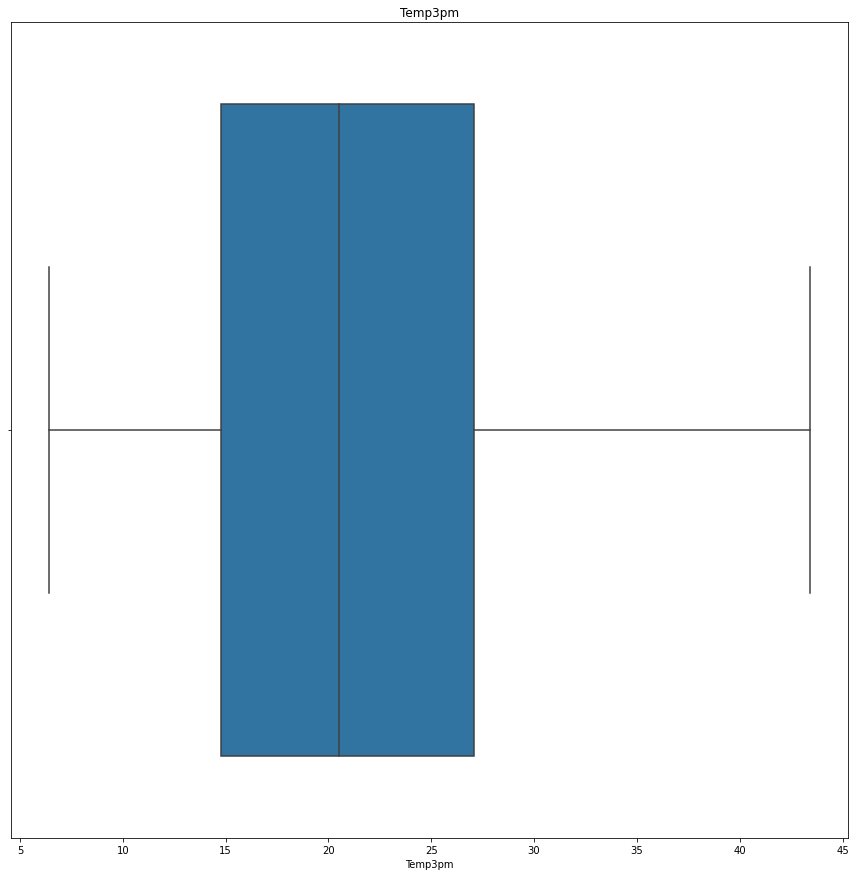

In [488]:
# check for outliers after IQR
for feature in numerical_feature:
    df=data.copy()
    plt.figure(figsize=(15,15))
    sns.boxplot(df[feature])
    plt.title(feature)

MinTemp


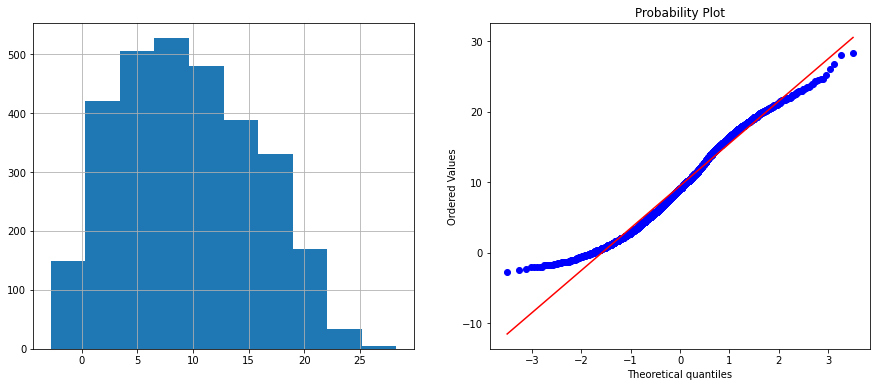

MaxTemp


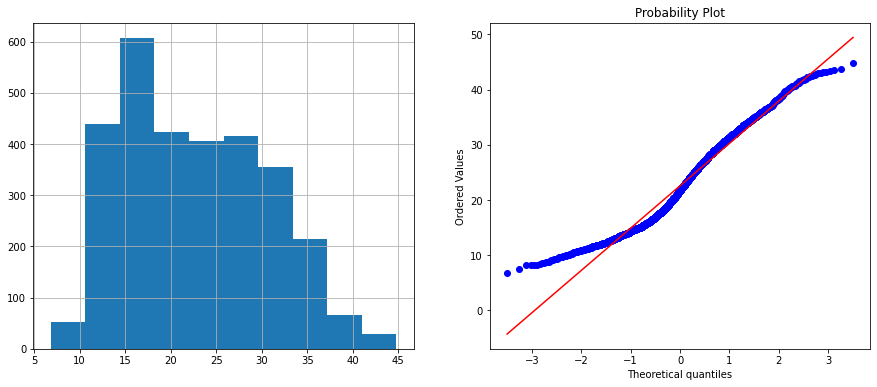

Rainfall


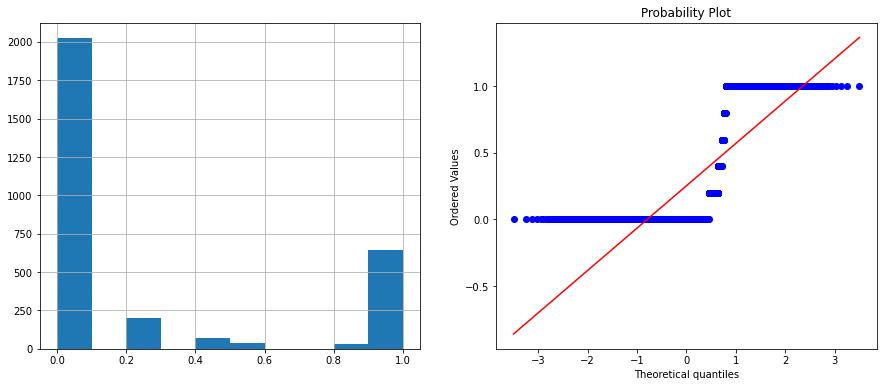

WindGustSpeed


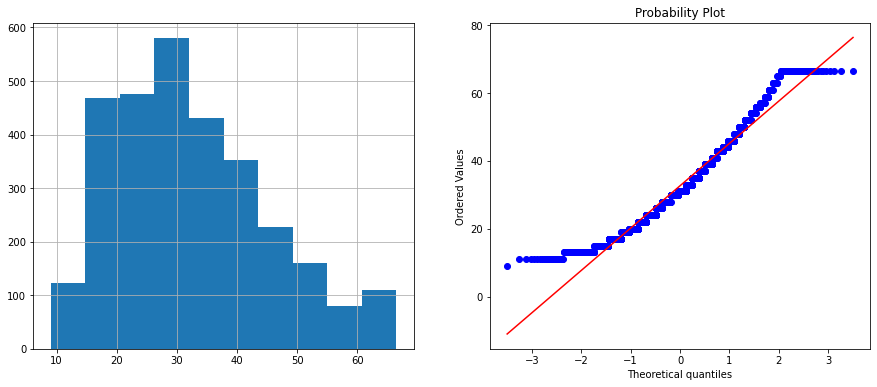

WindSpeed9am


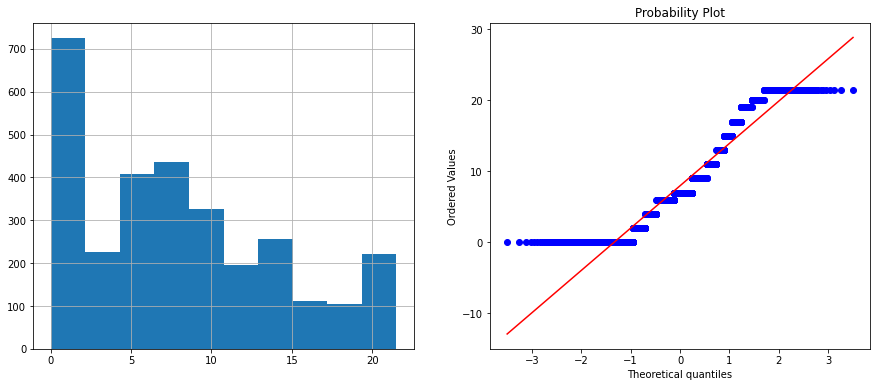

WindSpeed3pm


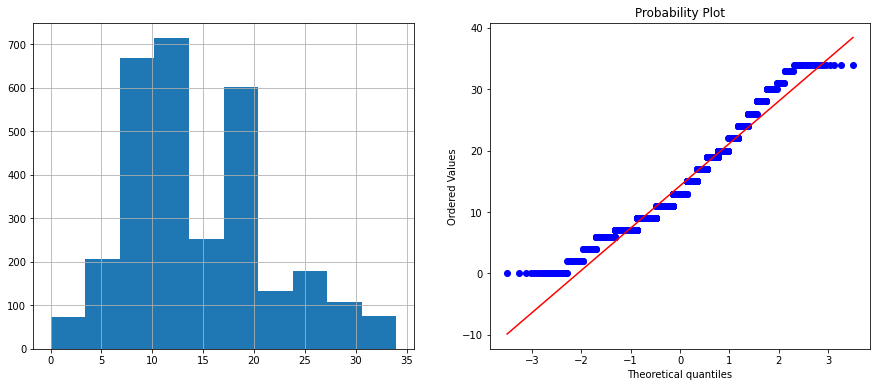

Humidity9am


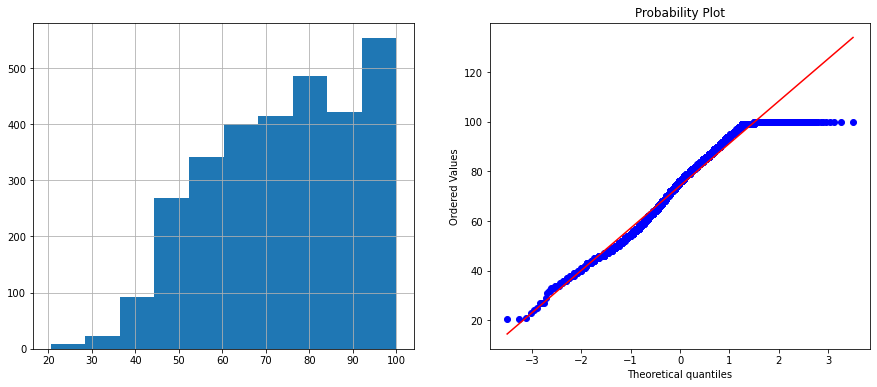

Humidity3pm


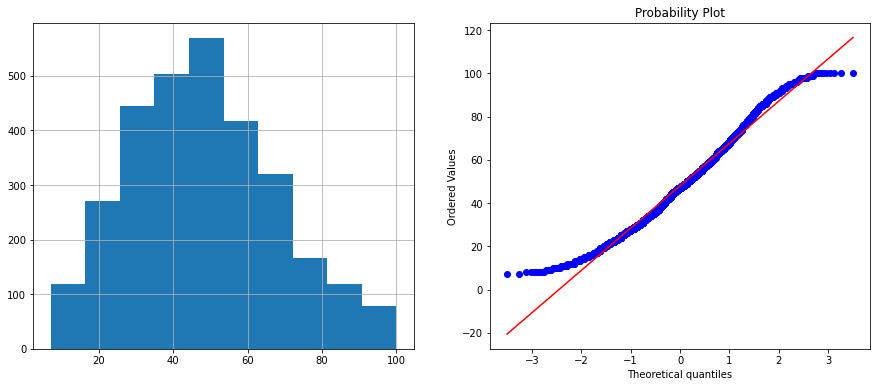

Pressure9am


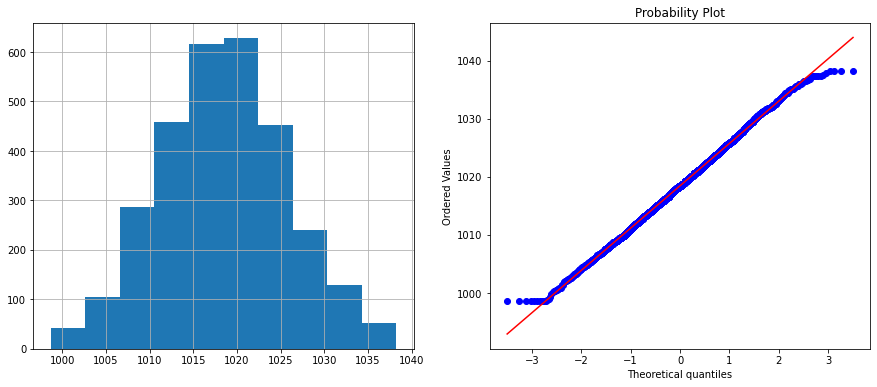

Pressure3pm


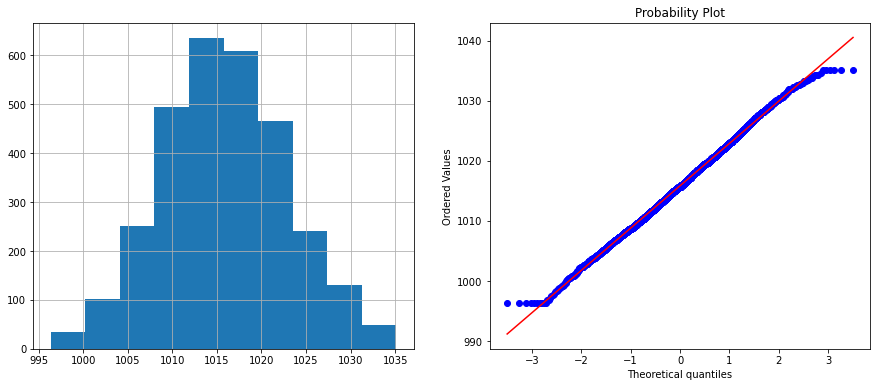

Temp9am


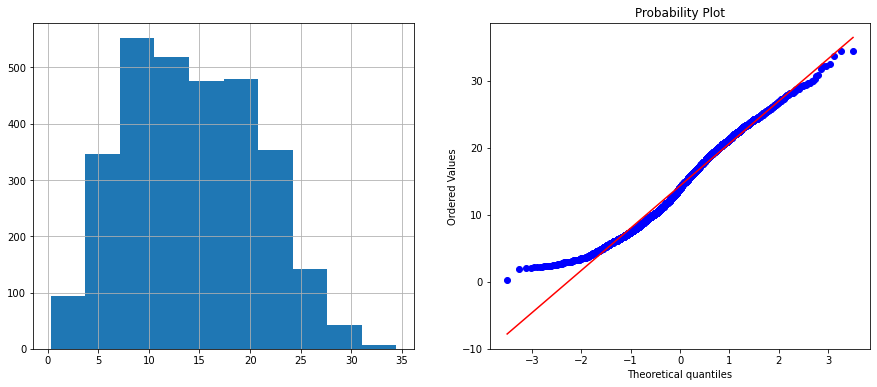

Temp3pm


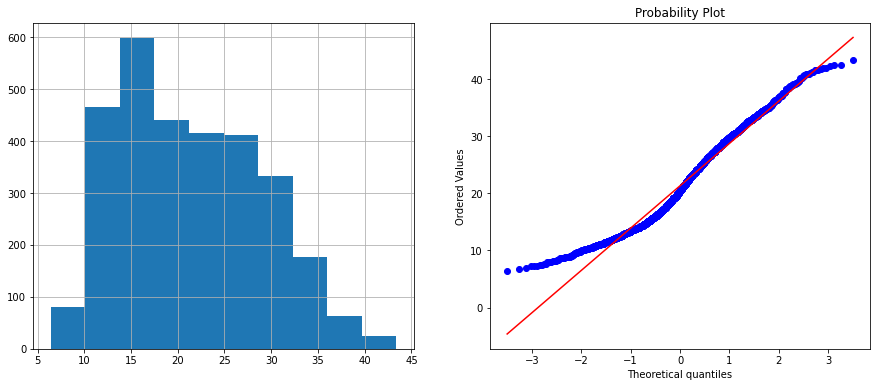

In [489]:
# ploting histogram and qqplot

import scipy.stats as stat
for feature in numerical_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [490]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,Date_year,Date_month,Date_day
0,2013-01-01,Los Angeles,11.3,26.5,0.0,2.0,56.0,13.0,3.0,19.0,...,46.0,26.0,1004.5,1003.2,19.7,25.7,0,2013,1,1
1,2013-01-02,Los Angeles,9.6,23.9,0.0,4.0,41.0,15.0,7.0,19.0,...,44.0,22.0,1014.4,1013.1,14.9,22.1,0,2013,1,2
2,2013-01-03,Los Angeles,10.5,28.8,0.0,10.0,26.0,10.0,4.0,11.0,...,43.0,22.0,1018.7,1014.8,17.1,26.5,0,2013,1,3
3,2013-01-04,Los Angeles,12.3,34.6,0.0,2.0,37.0,10.0,0.0,6.0,...,41.0,12.0,1015.1,1010.3,20.7,33.9,0,2013,1,4
4,2013-01-05,Los Angeles,12.9,35.8,0.0,2.0,41.0,1.0,0.0,6.0,...,41.0,9.0,1012.6,1009.2,22.4,34.4,0,2013,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,2021-06-21,Los Angeles,1.2,15.2,0.4,14.0,15.0,9.0,5.0,0.0,...,100.0,62.0,1029.4,1026.7,2.9,14.3,0,2021,6,21
3005,2021-06-22,Los Angeles,0.8,13.4,0.0,4.0,17.0,8.0,14.0,6.0,...,100.0,66.0,1029.4,1025.9,3.6,13.3,0,2021,6,22
3006,2021-06-23,Los Angeles,1.1,11.9,0.0,12.0,44.0,10.0,12.0,9.0,...,100.0,81.0,1022.3,1017.7,2.7,10.2,0,2021,6,23
3007,2021-06-24,Los Angeles,1.1,14.1,0.2,5.0,28.0,12.0,14.0,4.0,...,100.0,49.0,1018.8,1017.2,3.9,13.1,0,2021,6,24


In [491]:
# spliting independent and dependent features

X = data.drop(["RainTomorrow", "Date","Location"], axis=1)
y = data["RainTomorrow"] 

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [493]:
# Using SMOTE for imbalanced dependent features

from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("Number of points before fit {}".format(Counter(y_train)))
print("Number of points after fit {}".format(Counter(y_train_sm)))

Number of points before fit Counter({0: 1920, 1: 487})
Number of points after fit Counter({0: 1920, 1: 1920})


Model 0 starting 
Model taken is Decision Tree Classifier 
Test Accuracy is 78.90% 

Classification_report 
               precision    recall  f1-score   support

It won't rain       0.89      0.84      0.86       478
 It will rain       0.49      0.58      0.53       124

     accuracy                           0.79       602
    macro avg       0.69      0.71      0.70       602
 weighted avg       0.80      0.79      0.80       602


 Confusion_matrix 


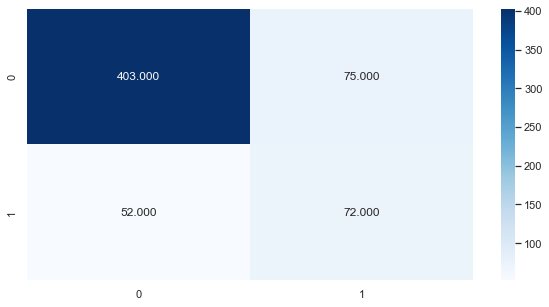


 

Model 1 starting 
Model taken is LogisticRegression 
Test Accuracy is 85.38% 

Classification_report 
               precision    recall  f1-score   support

It won't rain       0.96      0.85      0.90       478
 It will rain       0.60      0.85      0.71       124

     accuracy                           0.85       602
    macro avg       0.78      0.85      0.80       602
 weighted avg       0.88      0.85      0.86       602


 Confusion_matrix 


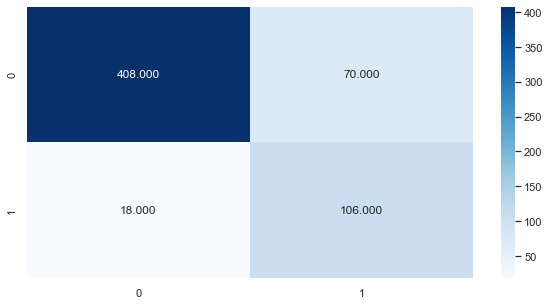


 

Model 2 starting 
Model taken is Random Forest Classifier 
Test Accuracy is 87.54% 

Classification_report 
               precision    recall  f1-score   support

It won't rain       0.92      0.93      0.92       478
 It will rain       0.71      0.68      0.69       124

     accuracy                           0.88       602
    macro avg       0.81      0.80      0.81       602
 weighted avg       0.87      0.88      0.87       602


 Confusion_matrix 


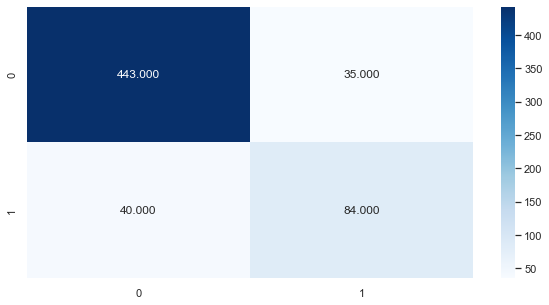


 

Model 3 starting 
Model taken is SVC 
Test Accuracy is 73.92% 

Classification_report 
               precision    recall  f1-score   support

It won't rain       0.94      0.72      0.81       478
 It will rain       0.43      0.81      0.56       124

     accuracy                           0.74       602
    macro avg       0.68      0.77      0.69       602
 weighted avg       0.83      0.74      0.76       602


 Confusion_matrix 


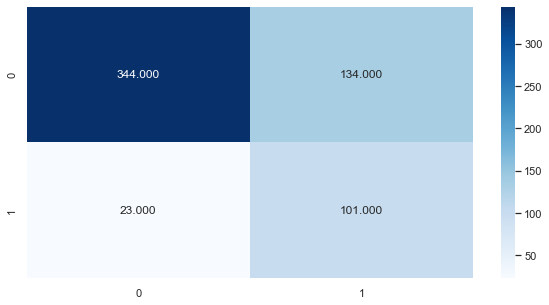


 

Model 4 starting 
Model taken is Gaussian NB 
Test Accuracy is 78.74% 

Classification_report 
               precision    recall  f1-score   support

It won't rain       0.92      0.80      0.86       478
 It will rain       0.49      0.75      0.59       124

     accuracy                           0.79       602
    macro avg       0.71      0.77      0.72       602
 weighted avg       0.84      0.79      0.80       602


 Confusion_matrix 


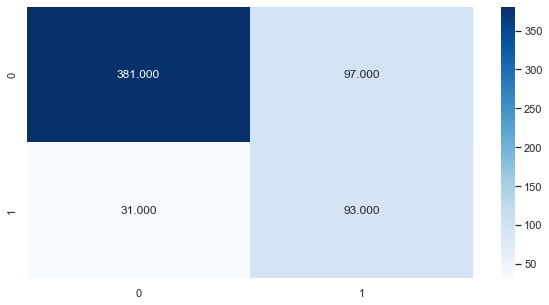


 

Model 5 starting 
Model taken is KNeighbors Classifier 
Test Accuracy is 76.58% 

Classification_report 
               precision    recall  f1-score   support

It won't rain       0.92      0.77      0.84       478
 It will rain       0.46      0.76      0.57       124

     accuracy                           0.77       602
    macro avg       0.69      0.76      0.71       602
 weighted avg       0.83      0.77      0.78       602


 Confusion_matrix 


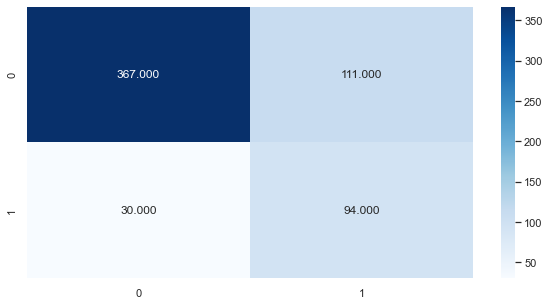


 

Model 6 starting 
Model taken is AdaBoost Classifier 
Test Accuracy is 84.05% 

Classification_report 
               precision    recall  f1-score   support

It won't rain       0.92      0.88      0.90       478
 It will rain       0.60      0.69      0.64       124

     accuracy                           0.84       602
    macro avg       0.76      0.79      0.77       602
 weighted avg       0.85      0.84      0.84       602


 Confusion_matrix 


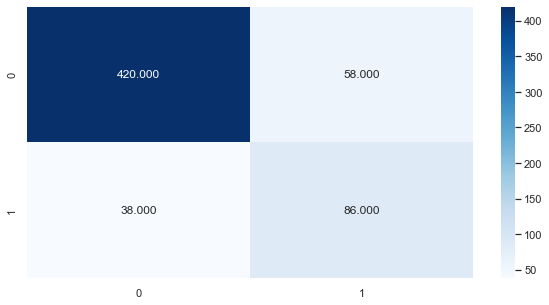


 

Model 7 starting 
Model taken is MLPClassifier 
Test Accuracy is 49.34% 

Classification_report 
               precision    recall  f1-score   support

It won't rain       0.98      0.37      0.54       478
 It will rain       0.29      0.98      0.44       124

     accuracy                           0.49       602
    macro avg       0.63      0.67      0.49       602
 weighted avg       0.84      0.49      0.52       602


 Confusion_matrix 


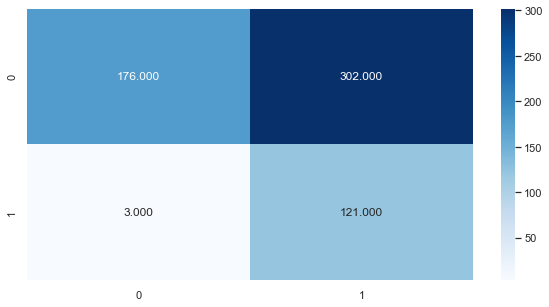


 

Model 8 starting 
Model taken is SGD Classifier 
Test Accuracy is 80.90% 

Classification_report 
               precision    recall  f1-score   support

It won't rain       0.96      0.79      0.87       478
 It will rain       0.52      0.86      0.65       124

     accuracy                           0.81       602
    macro avg       0.74      0.83      0.76       602
 weighted avg       0.87      0.81      0.82       602


 Confusion_matrix 


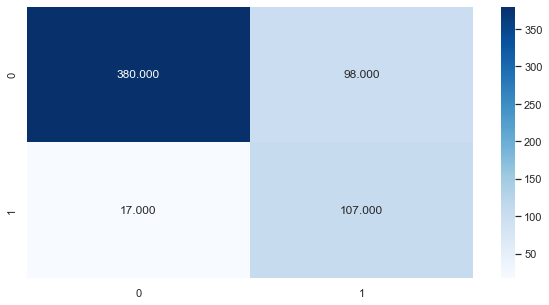


 

Model 9 starting 
Model taken is Extra Trees Classifier 
Test Accuracy is 87.21% 

Classification_report 
               precision    recall  f1-score   support

It won't rain       0.90      0.94      0.92       478
 It will rain       0.73      0.60      0.66       124

     accuracy                           0.87       602
    macro avg       0.81      0.77      0.79       602
 weighted avg       0.87      0.87      0.87       602


 Confusion_matrix 


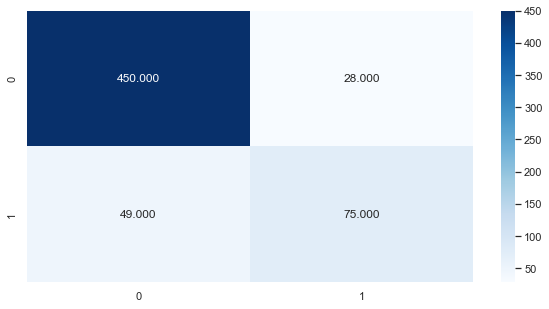


 

Model 10 starting 
Model taken is XGBClassifier 
Test Accuracy is 86.71% 

Classification_report 
               precision    recall  f1-score   support

It won't rain       0.91      0.93      0.92       478
 It will rain       0.70      0.63      0.66       124

     accuracy                           0.87       602
    macro avg       0.80      0.78      0.79       602
 weighted avg       0.86      0.87      0.86       602


 Confusion_matrix 


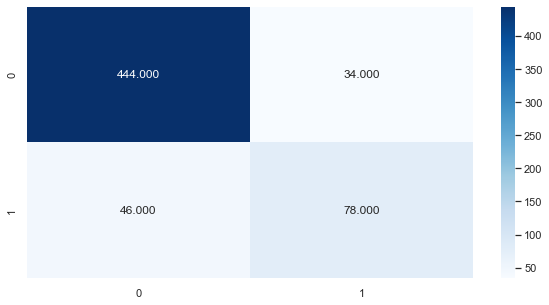

In [500]:
# Looping through each model and getting accuracy, classification report and confuson matrix

classification_models = [DecisionTreeClassifier,LogisticRegression,RandomForestClassifier,SVC,GaussianNB,KNeighborsClassifier,
          AdaBoostClassifier,MLPClassifier,SGDClassifier,
         ExtraTreesClassifier,xgb.XGBClassifier]

model_names= ['Decision Tree Classifier','LogisticRegression','Random Forest Classifier','SVC','Gaussian NB',
             'KNeighbors Classifier','AdaBoost Classifier','MLPClassifier','SGD Classifier','Extra Trees Classifier','XGBClassifier']
models_accuracy=[]
model_no=0
for m in classification_models:
    print('Model {} starting '.format(model_no))
    print('Model taken is {} '.format(model_names[model_no]))
    model_ = m()
    model_.fit(X_train_sm, y_train_sm)
    pred = model_.predict(X_test)
    acc = accuracy_score( y_test,pred)
    models_accuracy.append(acc)
    print('Test Accuracy is {:.2f}%'.format(acc*100),'\n')
    print('Classification_report ')
    print(classification_report(y_test, pred, target_names = ["It won't rain", "It will rain"]))
    print('\n','Confusion_matrix ')
    conf_matrix = confusion_matrix(y_test, pred)
    plt.figure(figsize = (10,5))
    sns.set(font_scale=1)

    plot_ = sns.heatmap(conf_matrix, annot=True,fmt= '.3f',cmap = 'Blues')
    plt.show()
    print('\n','\n')
    model_no +=1


In [501]:
accuracy_data = pd.DataFrame({"Model":model_names,
                      "Accuracy":models_accuracy}) 
accuracy_data

,Model,Accuracy
0,Decision Tree Classifier,0.789037
1,LogisticRegression,0.853821
2,Random Forest Classifier,0.875415
3,SVC,0.739203
4,Gaussian NB,0.787375
5,KNeighbors Classifier,0.765781
6,AdaBoost Classifier,0.840532
7,MLPClassifier,0.493355
8,SGD Classifier,0.808970
9,Extra Trees Classifier,0.872093


In [502]:
def accuracy_plot(x,y):
    plt.figure(figsize = (x,y))
    sns.set(font_scale=3)

    plots = sns.barplot("Model","Accuracy",data=accuracy_data,palette='Paired')

    plt.title(f'Multiple Bar Plot of Accuracy v/s Result',fontweight="bold")    # Title of plot
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.3f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=45, xytext=(0, 10),
                       textcoords='offset points',fontweight="bold")
    plt.xticks(rotation=70)
    plt.tight_layout()
    
    show()
    return

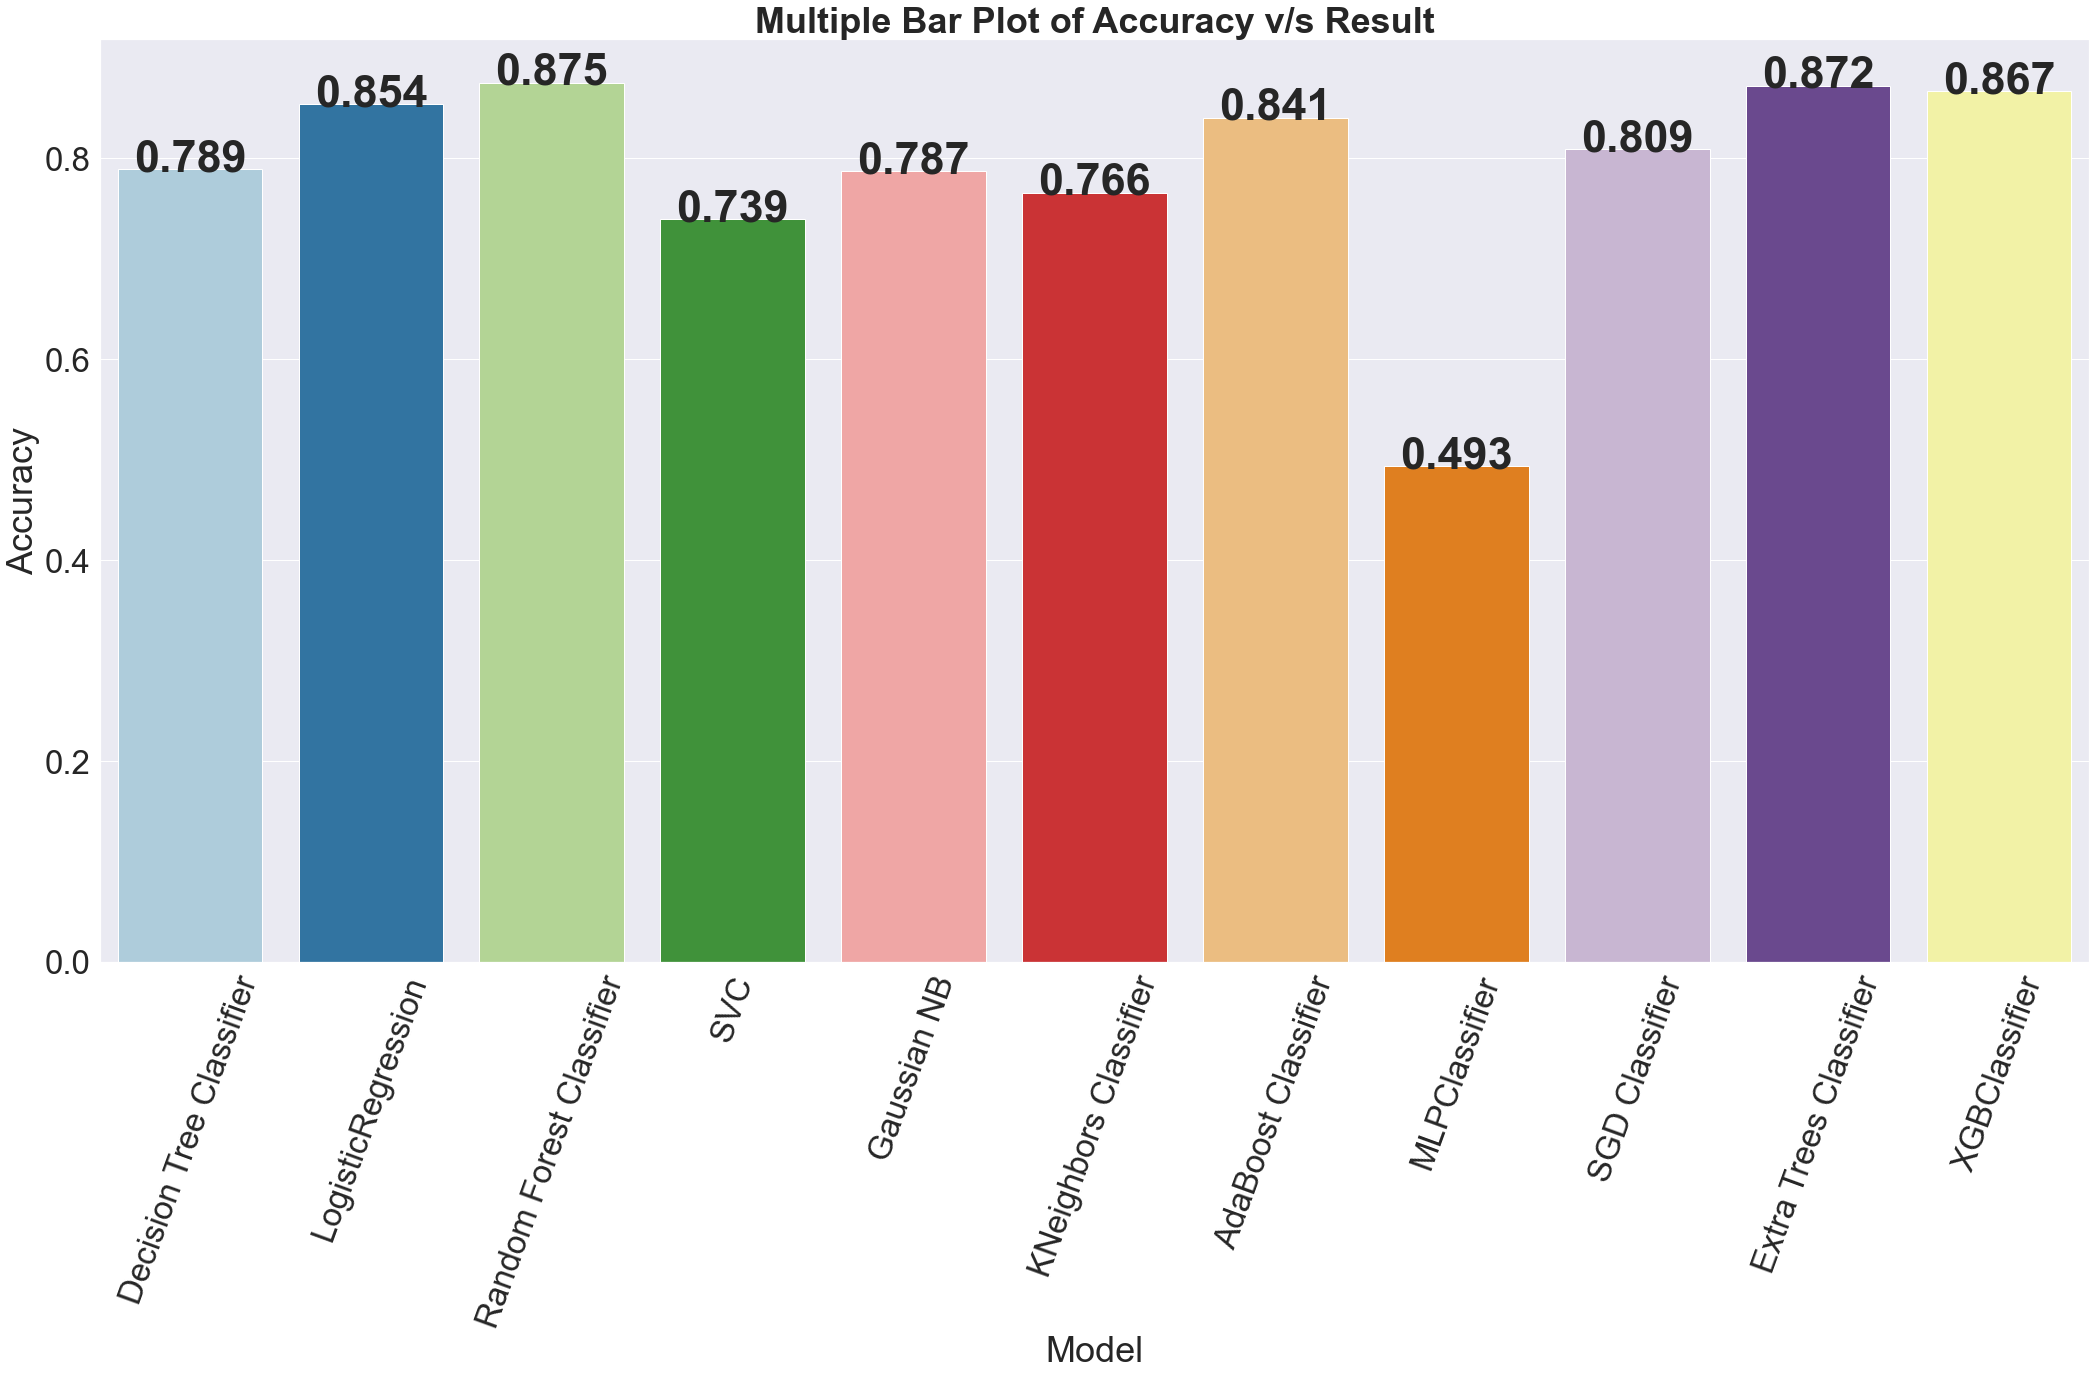

In [505]:
accuracy_plot(30,20)